## Data Loading, Initial Exploration, and Summary Statistics

This section imports necessary libraries, loads data from an Excel file, displays the first few rows of each dataset, checks for missing values, and provides basic summary statistics for the `Supply`, `Fabric`, and `Spare Part` datasets.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensuring that plots are displayed inside the notebook
%matplotlib inline

# Load the data from the Excel file
file_path = 'C:/Users/Skander/Downloads/Clothing ind 2022 Raw Materials ad Consumables Database.xlsx'

# Load data from each sheet
supply_data = pd.read_excel(file_path, sheet_name=' Supply')
fabric_data = pd.read_excel(file_path, sheet_name=' Fabric')
spare_part_data = pd.read_excel(file_path, sheet_name=' Spare part')

# Display the first few rows of each dataframe
print("Supply Data Preview:")
print(supply_data.head())
print("\nFabric Data Preview:")
print(fabric_data.head())
print("\nSpare Part Data Preview:")
print(spare_part_data.head())

# Initial Data Cleaning
# Check for missing values in each dataset
print("\nMissing Values in Supply Data:")
print(supply_data.isnull().sum())
print("\nMissing Values in Fabric Data:")
print(fabric_data.isnull().sum())
print("\nMissing Values in Spare Part Data:")
print(spare_part_data.isnull().sum())



# Basic summary statistics
print("\nSupply Data Statistics:")
print(supply_data.describe())
print("\nFabric Data Statistics:")
print(fabric_data.describe())
print("\nSpare Part Data Statistics:")
print(spare_part_data.describe())

Supply Data Preview:
          family                       id  \
0          LABEL  TJ109128 SKAT CARP JEAN   
1    RIVET NAILS             CL/RV STRASS   
2          LABEL              UDT WL 0028   
3        LEATHER   NATURAL LEATHER MEN/LO   
4  SEWING THREAD                 C1367/80   

                                supply name stock location  quantity  \
0   100*205 100%REC-CO skater carpenter jea          12B08       7.0   
1  Stud rivet Strass Etam Silver+Ant Copper          18A12   12818.0   
2             NON ECO woven sticker 30/50mm          07B04    6179.0   
3         NATURAL LEATHER MEN NON-COMPLIANT            NaN    5026.0   
4       Coats Dual Duty tex 80 C1367 5000 m          30B07      30.0   

  latest movement date latest movement date2  unit price currency3  \
0           2022-12-23   2022-12-23 00:00:00      0.1200       EUR   
1           2022-12-10   2022-12-10 00:00:00      0.0100       EUR   
2           2022-11-14   2022-11-14 00:00:00      0.0288       EU

## Data Cleaning for Supply Data

This section involves the following data cleaning steps for the `Supply` dataset:

1. **Delete Blank Columns:** Remove columns that contain all missing values.
2. **Delete Specific Column:** Drop the column `latest movement date2` if it exists.
3. **Delete Rows with Any Blanks:** Remove rows that have any missing values.
4. **Filter `last Movement date` Values:** Filter out rows where `last Movement date` is earlier than the year 2000. This involves converting the column to a datetime format and coercing any errors.
5. **Rename and Format `currency3` Column:** If the column `currency3` exists, rename it to `currency` and convert its values to uppercase.

The cleaned data is then displayed, along with information about the dataset.


In [2]:
# 1. Delete blank columns
supply_data = supply_data.dropna(axis=1, how='all')

# 2. Delete the column 'latest movement date2' if it exists
if 'latest movement date2' in supply_data.columns:
    supply_data = supply_data.drop('latest movement date2', axis=1)

# 3. Delete rows with any blanks
supply_data = supply_data.dropna()

# 4. Filter out 'last Movement date' values under the year 2000
# Assuming the column name is correctly provided and the date is in a datetime format
if 'last Movement date' in supply_data.columns:
    supply_data['last Movement date'] = pd.to_datetime(supply_data['last Movement date'], errors='coerce')  # Convert to datetime, coerce errors
    supply_data = supply_data[supply_data['last Movement date'].dt.year >= 2000]
if 'currency3' in supply_data.columns:
    supply_data = supply_data.rename(columns={'currency3': 'currency'})
    supply_data['currency'] = supply_data['currency'].str.upper()
# Display the cleaned data
print("Cleaned Supply Data Preview:")
print(supply_data.head())
print("\nCleaned Supply Data Info:")
print(supply_data.info())

Cleaned Supply Data Preview:
          family                        id  \
0          LABEL   TJ109128 SKAT CARP JEAN   
1    RIVET NAILS              CL/RV STRASS   
2          LABEL               UDT WL 0028   
4  SEWING THREAD                  C1367/80   
6    RIVET NAILS  CL/040184 BLK 8.3MM SHIN   

                                supply name stock location  quantity  \
0   100*205 100%REC-CO skater carpenter jea          12B08       7.0   
1  Stud rivet Strass Etam Silver+Ant Copper          18A12   12818.0   
2             NON ECO woven sticker 30/50mm          07B04    6179.0   
4       Coats Dual Duty tex 80 C1367 5000 m          30B07      30.0   
6       Nail Rivet 040184 black 8.3mm Shiny          08B03     200.0   

  latest movement date  unit price currency  total price in TND  \
0           2022-12-23      0.1200      EUR            2.780568   
1           2022-12-10      0.0100      EUR          424.301436   
2           2022-11-14      0.0288      EUR          589.067

## Data Cleaning for Fabric Data

This section includes the following steps to clean the `Fabric` dataset:

1. **Display Initial Data Preview and Info:** Show the first few rows and general information about the dataset.
2. **Check for NA Values:** Identify the distribution of missing values in each column.
3. **Remove Rows with Critical Blanks:** Remove rows with any missing values in columns where missing data would be problematic, including `fabric_id`, `Fabric Name`, `Market Quantity`, `In process Quantity`, `Total Quantity`, `Unit Price`, `currency`, and `Latest Movement Date`.
4. **Delete Completely Empty Columns:** Remove columns that contain all missing values.
5. **Format `currency` Column:** Convert all values in the `currency` column to uppercase.
6. **Display Cleaned Data:** Show the first few rows and general information about the cleaned dataset.
7. **Delete the `last_output` Column:** Remove the `last_output` column from the dataset.
8. **Check for NA Values Again:** Recheck the distribution of missing values in each column after cleaning.

The cleaned data is displayed along with the revised information about the dataset.


In [3]:
# Display initial data preview and info
print("Initial Fabric Data Preview:")
print(fabric_data.head())
print("\nInitial Fabric Data Info:")
print(fabric_data.info())

# Check for NA values to understand their distribution
print("\nNA Values in Each Column:")
print(fabric_data.isna().sum())

# Removing rows that contain any blanks in the columns where missing data would be problematic
columns_to_check = ['fabric_id', 'Fabric Name', 'Market Quantity', 'In process Quantity', 
                    'Total Quantity', 'Unit Price', 'currency', ' Latest Movement Date']
fabric_data_cleaned = fabric_data.dropna(subset=columns_to_check)

# Deleting completely empty columns
fabric_data_cleaned = fabric_data_cleaned.dropna(axis=1, how='all')

# Uppercase all values in the 'currency' column
fabric_data_cleaned['currency'] = fabric_data_cleaned['currency'].str.upper()

# Display the cleaned data
print("Cleaned Fabric Data Preview:")
print(fabric_data_cleaned.head())
print("\nCleaned Fabric Data Info:")
print(fabric_data_cleaned.info())

# Delete the 'last_output' column
fabric_data_cleaned = fabric_data_cleaned.drop(columns=['last_output'])



# Check again for NA values to understand their new distribution
print("\nRevised NA Values in Each Column:")
print(fabric_data_cleaned.isna().sum())

Initial Fabric Data Preview:
    fabric_id                                 Fabric Name  Market Quantity  \
0  10DNR130PJ             DENIMER R367 JORDAN GLAMOR BLUE              4.0   
1  10SWI153TO   SWIFT ULTRA POWER 12 SILVER BLUE POST REC             14.0   
2  10BOS237EM                 BOSSA MD 3938-A STR REGULAR              4.0   
3  10BOS238TC                         BOSSA HERLEEN BLUES              5.0   
4  10BOS239TC                       BOSSA RAMIREZ TRUBLUE              5.0   

   In process Quantity  Total Quantity  total quantity2  Unit Price currency  \
0                  0.0             4.0              4.0        0.05      EUR   
1                  0.0            14.0             14.0        0.05      EUR   
2                  0.0             4.0              4.0        0.50      EUR   
3                  0.0             5.0              5.0        0.50      EUR   
4                  0.0             5.0              5.0        0.50      EUR   

   total price in TND

## Data Cleaning for Spare Part Data

This section involves the following data cleaning steps for the `Spare Part` dataset:

1. **Remove Completely Empty Column:** Delete the column `12/31/2022` as it is completely empty.
2. **Define Critical Columns:** Identify critical columns where missing values are unacceptable, including `Band`, `Article number`, `Article name`, `quantity`, `unit price in tnd`, and `total price in tnd`.
3. **Drop Rows with Missing Values in Critical Columns:** Remove rows that have any missing values in the critical columns.
4. **Delete the `latest movement date` Column:** Drop the `latest movement date` column from the dataset.
5. **Check Cleaned Data:** Display the first few rows and general information about the cleaned dataset.
6. **Check NA Values in Cleaned Data:** Show the distribution of missing values in each column after cleaning.

The cleaned data is then displayed, along with the revised information about the dataset.


In [4]:
# Remove the completely empty column
spare_part_data = spare_part_data.drop(columns=['12/31/2022'])

# Define critical columns where missing values should lead to row deletion
critical_columns = ['Band', 'Article number', 'Article name', 'quantity', 'unit price in tnd', 'total price in tnd']

# Drop rows with missing values in critical columns only
spare_part_data_cleaned = spare_part_data.dropna(subset=critical_columns)

# Delete the 'latest movement date' column
spare_part_data_cleaned = spare_part_data_cleaned.drop(columns=['latest movement date'])

# Check again the content of the cleaned data
print("Cleaned Spare Part Data Preview:")
print(spare_part_data_cleaned.head())
print("\nCleaned Spare Part Data Info:")
print(spare_part_data_cleaned.info())

# Display NA values in the cleaned data
print("\nRevised NA Values in Each Column:")
print(spare_part_data_cleaned.isna().sum())

Cleaned Spare Part Data Preview:
      Band Article number                 Article name  quantity  \
0  NEEDLES      DCAgui009       NEEDLE/128 GAS SES 120     260.0   
1  NEEDLES      DCAgui024  NEEDLE/128 GAS SES SERV 120    1680.0   
2  NEEDLES      DCAgui025  NEEDLE/128 GAS SES SERV 130    1580.0   
3  NEEDLES      DCAgui027      NEEDLE/128 SUK SERV 120     490.0   
4  NEEDLES      DCAgui031             NEEDLE/134 R 120     100.0   

   unit price in tnd  total price in tnd  \
0           0.703689          182.959140   
1           0.777409         1306.046784   
2           0.760264         1201.217120   
3           0.688170          337.203300   
4           0.386686           38.668600   

  Latest Movement date Adjusted by ECOVIS  Number of Days Since last Movement  \
0                              2022-12-31                                 0.0   
1                              2022-12-31                                 0.0   
2                              2022-12-31         

## Calculating Unit Price in TND for Supply Data

This section defines a function to calculate the `Unit Price in TND` for the `Supply` dataset based on the currency and applies it to create a new column:

1. **Define the Function:** Create a function `calculate_supply_price_in_tnd` that takes a row as input, checks the currency, and converts the unit price to TND using the following exchange rates:
   - `EUR` to TND: 3.3102
   - `USD` to TND: 3.1101
   - `GBP` to TND: 3.7004
   - Default case: no conversion if the currency is already in TND or unknown.

2. **Apply the Function:** Use the `apply` method to apply the function to each row in the `Supply` dataset and create a new column `Unit Price in TND`.

3. **Display Updated DataFrame:** Print the updated DataFrame to verify the addition of the new column.

The new column with unit prices converted to TND is now added to the dataset.


In [5]:
# Define a function to calculate 'Unit Price in TND'
def calculate_supply_price_in_tnd(row):
    currency = row['currency'].strip().upper()
    if currency == 'TND':
        return row['unit price']
    elif currency == 'EUR':
        return row['unit price'] * 3.3102
    elif currency == 'USD':
        return row['unit price'] * 3.1101
    elif currency == 'GBP':
        return row['unit price'] * 3.7004
    else:
        return row['unit price']  # Default case if no known currency is matched

# Apply the function to create a new column
supply_data['Unit Price in TND'] = supply_data.apply(calculate_supply_price_in_tnd, axis=1)

# Print the updated DataFrame to see the new column
print(supply_data)

                    family                        id  \
0                    LABEL   TJ109128 SKAT CARP JEAN   
1              RIVET NAILS              CL/RV STRASS   
2                    LABEL               UDT WL 0028   
4            SEWING THREAD                  C1367/80   
6              RIVET NAILS  CL/040184 BLK 8.3MM SHIN   
...                    ...                       ...   
24394      COLORED CLOSURE         AWZP01-8GREY/40CM   
24395      COLORED CLOSURE         AWZP01-8GREY/41CM   
24396      COLORED CLOSURE       AWZP01-8GREY/42.5CM   
24397  MISCELLANEOUS ITEMS        063260/ SHIP BADGE   
24398  MISCELLANEOUS ITEMS        063261/ CREST BADG   

                                    supply name stock location  quantity  \
0       100*205 100%REC-CO skater carpenter jea          12B08       7.0   
1      Stud rivet Strass Etam Silver+Ant Copper          18A12   12818.0   
2                 NON ECO woven sticker 30/50mm          07B04    6179.0   
4           Coats Dual 

## Calculating Unit Price in TND for Fabric Data

This section defines a function to calculate the `Unit Price in TND` for the `Fabric` dataset based on the currency and applies it to create a new column:

1. **Define the Function:** Create a function `calculate_fabric_price_in_tnd` that takes a row as input, checks the currency, and converts the unit price to TND using the following exchange rates:
   - `EUR` to TND: 3.3102
   - `USD` to TND: 3.1101
   - Default case: no conversion if the currency is already in TND or unknown.

2. **Apply the Function:** Use the `apply` method to apply the function to each row in the `Fabric` dataset and create a new column `Unit Price in TND`.

3. **Display Updated DataFrame:** Print the updated DataFrame to verify the addition of the new column.

The new column with unit prices converted to TND is now added to the dataset.


In [6]:
# Define a function to calculate 'Unit Price in TND'
def calculate_fabric_price_in_tnd(row):
    currency = row['currency'].strip().upper()
    if currency == 'TND':
        return row['Unit Price']
    elif currency == 'EUR':
        return row['Unit Price'] * 3.3102
    elif currency == 'USD':
        return row['Unit Price'] * 3.1101
    else:
        return row['Unit Price']  # Default case if no known currency is matched

# Apply the function to create a new column
fabric_data_cleaned['Unit Price in TND'] = fabric_data_cleaned.apply(calculate_fabric_price_in_tnd, axis=1)

# Print the updated DataFrame to see the new column
print(fabric_data_cleaned)

       fabric_id                                   Fabric Name  \
0     10DNR130PJ               DENIMER R367 JORDAN GLAMOR BLUE   
1     10SWI153TO     SWIFT ULTRA POWER 12 SILVER BLUE POST REC   
2     10BOS237EM                   BOSSA MD 3938-A STR REGULAR   
3     10BOS238TC                           BOSSA HERLEEN BLUES   
4     10BOS239TC                         BOSSA RAMIREZ TRUBLUE   
...          ...                                           ...   
4792  WIN97190PA   WINNITEX 097190 PALE PINK COLLAR #28166479D   
4793  ZARBAROBBK                        ZARES BARON BLUE BLACK   
4794  ZARMASERGD                ZARES MASESZI S60 P.SGFFAF RGD   
4795   ZARSZELLA                                  ZARES SZELLA   
4796  ZARZR16-18                                ZARES ZR-16-18   

      Market Quantity  In process Quantity  Total Quantity  total quantity2  \
0                 4.0                  0.0             4.0              4.0   
1                14.0                  0.0       

## Mapping Stock Movement Class to Movement Category

This section defines a function to map stock movement class values to more descriptive movement categories and applies it to create a new column in each dataset:

1. **Define the Function:** Create a function `map_movement_class` that maps stock movement class values to movement categories:
   - Class values 1 and 2 are mapped to 'Moving'.
   - Class values 3 and 4 are mapped to 'Non/Slow Moving'.
   - Other values are mapped to 'Unknown' to handle any unexpected values.

2. **Apply the Function:** Use the `apply` method to apply the function to the `Stock Movement Class` column in the `Supply`, `Fabric`, and `Spare Part` datasets, creating a new column `Movement`.

3. **Display Updated DataFrame:** Print the first few rows of each updated dataset to verify the addition of the new `Movement` column.

The new column categorizes the stock movement for easier analysis.


In [7]:
# Create a function to map the values
def map_movement_class(class_value):
    if class_value in [1, 2]:
        return 'Moving'
    elif class_value in [3, 4]:
        return 'Non/Slow Moving'
    else:
        return 'Unknown'  # Handle unknown values if any

# Apply the function to create the 'Movement' column
supply_data['Movement'] = supply_data['Stock Movement Class'].apply(map_movement_class)
fabric_data_cleaned['Movement'] = fabric_data_cleaned['Stock Movement Class'].apply(map_movement_class)
spare_part_data_cleaned['Movement'] = spare_part_data_cleaned['Stock Movement Class'].apply(map_movement_class)

# Display the updated DataFrame
print(supply_data.head())
print(fabric_data_cleaned.head())
print(spare_part_data_cleaned.head())

          family                        id  \
0          LABEL   TJ109128 SKAT CARP JEAN   
1    RIVET NAILS              CL/RV STRASS   
2          LABEL               UDT WL 0028   
4  SEWING THREAD                  C1367/80   
6    RIVET NAILS  CL/040184 BLK 8.3MM SHIN   

                                supply name stock location  quantity  \
0   100*205 100%REC-CO skater carpenter jea          12B08       7.0   
1  Stud rivet Strass Etam Silver+Ant Copper          18A12   12818.0   
2             NON ECO woven sticker 30/50mm          07B04    6179.0   
4       Coats Dual Duty tex 80 C1367 5000 m          30B07      30.0   
6       Nail Rivet 040184 black 8.3mm Shiny          08B03     200.0   

  latest movement date  unit price currency  total price in TND  \
0           2022-12-23      0.1200      EUR            2.780568   
1           2022-12-10      0.0100      EUR          424.301436   
2           2022-11-14      0.0288      EUR          589.067303   
4           2022-11-11

In [8]:
supply_data_filtered = supply_data[['id', 'supply name', 'quantity', 'Unit Price in TND', 'Stock Movement Class', 'currency','Movement']]
fabric_data_filtered = fabric_data_cleaned[['fabric_id', 'Fabric Name', 'Total Quantity', 'Unit Price in TND', 'Stock Movement Class', 'currency','Movement']]
spare_part_data_filtered = spare_part_data_cleaned[['Article number', 'Article name', 'quantity', 'unit price in tnd', 'Stock Movement Class','Movement']]

## Merging and Finalizing the Data

This section concatenates the filtered datasets into a single dataframe, adds a new column to identify the type of data, renames columns for consistency, and reorders the columns for the final dataset

In [9]:
# Concatenate the dataframes
Consumables_and_Raw_Materials_Data = pd.concat([supply_data_filtered, fabric_data_filtered, spare_part_data_filtered], ignore_index=True)

# Add a new column 'type'
Consumables_and_Raw_Materials_Data['type'] = np.where(
    Consumables_and_Raw_Materials_Data['id'].notna(), 'Supply',
    np.where(Consumables_and_Raw_Materials_Data['fabric_id'].notna(), 'Fabric', 'Spare Part')
)

# Define a mapping for the type column
type_mapping = {
    'id': 'id',
    'fabric_id': 'id',
    'Article number': 'id',
    'supply name': 'Name',
    'Fabric Name': 'Name',
    'Article name': 'Name',
    'quantity': 'quantity',
    'Total Quantity': 'quantity',
    'unit price in tnd': 'Unit Price in TND',
    'Unit Price in TND': 'Unit Price in TND',
    'Stock Movement Class': 'Stock Movement Class',
    'Movement': 'Movement'
}

# Rename the columns
Consumables_and_Raw_Materials_Data.rename(columns=type_mapping, inplace=True)

# Reorder the columns as per your requirement
Consumables_and_Raw_Materials_Data = Consumables_and_Raw_Materials_Data[['id', 'type', 'Name', 'Unit Price in TND', 'quantity', 'Stock Movement Class', 'Movement']]

# Display the merged dataframe
print(Consumables_and_Raw_Materials_Data.head())



                         id   id   id    type  \
0   TJ109128 SKAT CARP JEAN  NaN  NaN  Supply   
1              CL/RV STRASS  NaN  NaN  Supply   
2               UDT WL 0028  NaN  NaN  Supply   
3                  C1367/80  NaN  NaN  Supply   
4  CL/040184 BLK 8.3MM SHIN  NaN  NaN  Supply   

                                       Name Name Name  Unit Price in TND  \
0   100*205 100%REC-CO skater carpenter jea  NaN  NaN           0.397224   
1  Stud rivet Strass Etam Silver+Ant Copper  NaN  NaN           0.033102   
2             NON ECO woven sticker 30/50mm  NaN  NaN           0.095334   
3       Coats Dual Duty tex 80 C1367 5000 m  NaN  NaN          14.664186   
4       Nail Rivet 040184 black 8.3mm Shiny  NaN  NaN           0.033102   

   Unit Price in TND  quantity  quantity  Stock Movement Class  \
0                NaN       7.0       NaN                   1.0   
1                NaN   12818.0       NaN                   1.0   
2                NaN    6179.0       NaN          

In [10]:
Consumables_and_Raw_Materials_Data.head(10)

,id,id,id,type,Name,Name,Name,Unit Price in TND,Unit Price in TND,quantity,quantity,Stock Movement Class,Movement
0,TJ109128 SKAT CARP JEAN,NaN,NaN,Supply,100*205 100%REC-CO skater carpenter jea,NaN,NaN,0.397224,NaN,7.0,NaN,1.0,Moving
1,CL/RV STRASS,NaN,NaN,Supply,Stud rivet Strass Etam Silver+Ant Copper,NaN,NaN,0.033102,NaN,12818.0,NaN,1.0,Moving
2,UDT WL 0028,NaN,NaN,Supply,NON ECO woven sticker 30/50mm,NaN,NaN,0.095334,NaN,6179.0,NaN,1.0,Moving
3,C1367/80,NaN,NaN,Supply,Coats Dual Duty tex 80 C1367 5000 m,NaN,NaN,14.664186,NaN,30.0,NaN,1.0,Moving
4,CL/040184 BLK 8.3MM SHIN,NaN,NaN,Supply,Nail Rivet 040184 black 8.3mm Shiny,NaN,NaN,0.033102,NaN,200.0,NaN,4.0,Non/Slow Moving
5,STI5112A.A000,NaN,NaN,Supply,Button nail PK4412M.A000.AF54.TM,NaN,NaN,0.026813,NaN,1150.0,NaN,4.0,Non/Slow Moving
6,THJ NAV SIDE EDGE 96CM,NaN,NaN,Supply,THJ Navy/white ribbed edge 96cm,NaN,NaN,9.930600,NaN,3.0,NaN,4.0,Non/Slow Moving
7,THJ NAV SIDE EDGE 71CM,NaN,NaN,Supply,THJ Navy/white ribbed edge 71cm,NaN,NaN,9.930600,NaN,51.0,NaN,4.0,Non/Slow Moving
8,THJ NAV SIDE EDGE 86CM,NaN,NaN,Supply,THJ Navy/white ribbed edge 86cm,NaN,NaN,9.930600,NaN,128.0,NaN,4.0,Non/Slow Moving
9,T-VNG000I3000/ID,NaN,NaN,Supply,NAIL ALUMU 2/9/8.5MM I3-LCAPC02 V000.73,NaN,NaN,0.019861,NaN,14223.0,NaN,4.0,Non/Slow Moving


In [11]:
Consumables_and_Raw_Materials_Data.tail(10)

,id,id,id,type,Name,Name,Name,Unit Price in TND,Unit Price in TND,quantity,quantity,Stock Movement Class,Movement
35954,NaN,NaN,DXRecp001019,Spare Part,NaN,NaN,SCREW/SPM508,NaN,5.947200,2.0,NaN,1.0,Moving
35955,NaN,NaN,DXRecp001020,Spare Part,NaN,NaN,NUT / SPM528,NaN,3.270018,2.0,NaN,1.0,Moving
35956,NaN,NaN,DXRecp001028,Spare Part,NaN,NaN,ALLEN SCREW/M500,NaN,0.510000,2.0,NaN,1.0,Moving
35957,NaN,NaN,DXRecp001029,Spare Part,NaN,NaN,KNIFE LOCK SCREW /M504,NaN,5.210000,5.0,NaN,4.0,Non/Slow Moving
35958,NaN,NaN,FL050117,Spare Part,NaN,NaN,PAN HEAD SCREW X353,NaN,1.000000,18.0,NaN,4.0,Non/Slow Moving
35959,NaN,NaN,FL050118,Spare Part,NaN,NaN,VIS/ADJ X350,NaN,1.000000,5.0,NaN,4.0,Non/Slow Moving
35960,NaN,NaN,FL050120,Spare Part,NaN,NaN,PAN HEAD SCREW X352,NaN,1.000000,19.0,NaN,4.0,Non/Slow Moving
35961,NaN,NaN,FL050121,Spare Part,NaN,NaN,VIS/DT0149-001,NaN,1.000000,11.0,NaN,4.0,Non/Slow Moving
35962,NaN,NaN,R00013,Spare Part,NaN,NaN,SCREW FIX JUKI SUP KNIFE (R),NaN,0.300000,2.0,NaN,4.0,Non/Slow Moving
35963,NaN,NaN,ST90015,Spare Part,NaN,NaN,VIS/DT0122001/DEA37362,NaN,26.974259,16.0,NaN,2.0,Moving


In [12]:

# Change column names containing NaN values to 'nan'
Consumables_and_Raw_Materials_Data.columns = Consumables_and_Raw_Materials_Data.columns.fillna('nan')
Consumables_and_Raw_Materials_Data.tail()

,id,id,id,type,Name,Name,Name,Unit Price in TND,Unit Price in TND,quantity,quantity,Stock Movement Class,Movement
35959,NaN,NaN,FL050118,Spare Part,NaN,NaN,VIS/ADJ X350,NaN,1.000000,5.0,NaN,4.0,Non/Slow Moving
35960,NaN,NaN,FL050120,Spare Part,NaN,NaN,PAN HEAD SCREW X352,NaN,1.000000,19.0,NaN,4.0,Non/Slow Moving
35961,NaN,NaN,FL050121,Spare Part,NaN,NaN,VIS/DT0149-001,NaN,1.000000,11.0,NaN,4.0,Non/Slow Moving
35962,NaN,NaN,R00013,Spare Part,NaN,NaN,SCREW FIX JUKI SUP KNIFE (R),NaN,0.300000,2.0,NaN,4.0,Non/Slow Moving
35963,NaN,NaN,ST90015,Spare Part,NaN,NaN,VIS/DT0122001/DEA37362,NaN,26.974259,16.0,NaN,2.0,Moving


In [13]:
# Get the index of the column named 'id'
index_of_id_column = Consumables_and_Raw_Materials_Data.columns.get_loc('id')
print("Index of 'id' column:", index_of_id_column)






Index of 'id' column: [ True  True  True False False False False False False False False False
 False]


In [14]:
# Concatenate the 'id' columns into a single column
Consumables_and_Raw_Materials_Data['ID'] = Consumables_and_Raw_Materials_Data.iloc[:, :3].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the original 'id' columns
columns_to_drop = ['id', 'id', 'id']  # Specify the names of the columns to drop
Consumables_and_Raw_Materials_Data.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
print(Consumables_and_Raw_Materials_Data.head())



     type                                      Name Name Name  \
0  Supply   100*205 100%REC-CO skater carpenter jea  NaN  NaN   
1  Supply  Stud rivet Strass Etam Silver+Ant Copper  NaN  NaN   
2  Supply             NON ECO woven sticker 30/50mm  NaN  NaN   
3  Supply       Coats Dual Duty tex 80 C1367 5000 m  NaN  NaN   
4  Supply       Nail Rivet 040184 black 8.3mm Shiny  NaN  NaN   

   Unit Price in TND  Unit Price in TND  quantity  quantity  \
0           0.397224                NaN       7.0       NaN   
1           0.033102                NaN   12818.0       NaN   
2           0.095334                NaN    6179.0       NaN   
3          14.664186                NaN      30.0       NaN   
4           0.033102                NaN     200.0       NaN   

   Stock Movement Class         Movement                        ID  
0                   1.0           Moving   TJ109128 SKAT CARP JEAN  
1                   1.0           Moving              CL/RV STRASS  
2                   1.0

In [15]:
Consumables_and_Raw_Materials_Data.head()

,type,Name,Name,Name,Unit Price in TND,Unit Price in TND,quantity,quantity,Stock Movement Class,Movement,ID
0,Supply,100*205 100%REC-CO skater carpenter jea,NaN,NaN,0.397224,NaN,7.0,NaN,1.0,Moving,TJ109128 SKAT CARP JEAN
1,Supply,Stud rivet Strass Etam Silver+Ant Copper,NaN,NaN,0.033102,NaN,12818.0,NaN,1.0,Moving,CL/RV STRASS
2,Supply,NON ECO woven sticker 30/50mm,NaN,NaN,0.095334,NaN,6179.0,NaN,1.0,Moving,UDT WL 0028
3,Supply,Coats Dual Duty tex 80 C1367 5000 m,NaN,NaN,14.664186,NaN,30.0,NaN,1.0,Moving,C1367/80
4,Supply,Nail Rivet 040184 black 8.3mm Shiny,NaN,NaN,0.033102,NaN,200.0,NaN,4.0,Non/Slow Moving,CL/040184 BLK 8.3MM SHIN


In [16]:
# Concatenate the 'Name' columns into a single column
Consumables_and_Raw_Materials_Data['NAME'] = Consumables_and_Raw_Materials_Data.iloc[:, [1, 2, 3]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the original 'Name' columns
columns_to_drop = ['Name', 'Name', 'Name']  # Specify the names of the columns to drop
Consumables_and_Raw_Materials_Data.drop(columns=columns_to_drop, inplace=True)

# Rename the concatenated 'Name' column to 'Name'
Consumables_and_Raw_Materials_Data.rename(columns={'Name_combined': 'Name'}, inplace=True)

# Display the updated DataFrame
print(Consumables_and_Raw_Materials_Data.head())


     type  Unit Price in TND  Unit Price in TND  quantity  quantity  \
0  Supply           0.397224                NaN       7.0       NaN   
1  Supply           0.033102                NaN   12818.0       NaN   
2  Supply           0.095334                NaN    6179.0       NaN   
3  Supply          14.664186                NaN      30.0       NaN   
4  Supply           0.033102                NaN     200.0       NaN   

   Stock Movement Class         Movement                        ID  \
0                   1.0           Moving   TJ109128 SKAT CARP JEAN   
1                   1.0           Moving              CL/RV STRASS   
2                   1.0           Moving               UDT WL 0028   
3                   1.0           Moving                  C1367/80   
4                   4.0  Non/Slow Moving  CL/040184 BLK 8.3MM SHIN   

                                       NAME  
0   100*205 100%REC-CO skater carpenter jea  
1  Stud rivet Strass Etam Silver+Ant Copper  
2             

In [17]:
Consumables_and_Raw_Materials_Data.tail()

,type,Unit Price in TND,Unit Price in TND,quantity,quantity,Stock Movement Class,Movement,ID,NAME
35959,Spare Part,NaN,1.000000,5.0,NaN,4.0,Non/Slow Moving,FL050118,VIS/ADJ X350
35960,Spare Part,NaN,1.000000,19.0,NaN,4.0,Non/Slow Moving,FL050120,PAN HEAD SCREW X352
35961,Spare Part,NaN,1.000000,11.0,NaN,4.0,Non/Slow Moving,FL050121,VIS/DT0149-001
35962,Spare Part,NaN,0.300000,2.0,NaN,4.0,Non/Slow Moving,R00013,SCREW FIX JUKI SUP KNIFE (R)
35963,Spare Part,NaN,26.974259,16.0,NaN,2.0,Moving,ST90015,VIS/DT0122001/DEA37362


In [18]:
# Concatenate the 'Unit Price in TND' columns into a single column
Consumables_and_Raw_Materials_Data['Unit_Price_in_TND'] = Consumables_and_Raw_Materials_Data.iloc[:, [1, 2]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the original 'Unit Price in TND' columns
columns_to_drop = ['Unit Price in TND', 'Unit Price in TND']  # Specify the names of the columns to drop
Consumables_and_Raw_Materials_Data.drop(columns=columns_to_drop, inplace=True)

# Rename the concatenated 'Unit Price in TND' column to 'Unit Price in TND'
Consumables_and_Raw_Materials_Data.rename(columns={'Unit_Price_combined': 'Unit Price in TND'}, inplace=True)

Consumables_and_Raw_Materials_Data.tail()


,type,quantity,quantity,Stock Movement Class,Movement,ID,NAME,Unit_Price_in_TND
35959,Spare Part,5.0,NaN,4.0,Non/Slow Moving,FL050118,VIS/ADJ X350,1.0
35960,Spare Part,19.0,NaN,4.0,Non/Slow Moving,FL050120,PAN HEAD SCREW X352,1.0
35961,Spare Part,11.0,NaN,4.0,Non/Slow Moving,FL050121,VIS/DT0149-001,1.0
35962,Spare Part,2.0,NaN,4.0,Non/Slow Moving,R00013,SCREW FIX JUKI SUP KNIFE (R),0.3
35963,Spare Part,16.0,NaN,2.0,Moving,ST90015,VIS/DT0122001/DEA37362,26.974258999999996


In [19]:
# Concatenate the 'Unit Price in TND' columns into a single column
Consumables_and_Raw_Materials_Data['Quantity'] = Consumables_and_Raw_Materials_Data.iloc[:, [1, 2]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop the original 'Unit Price in TND' columns
columns_to_drop = ['quantity', 'quantity']  # Specify the names of the columns to drop
Consumables_and_Raw_Materials_Data.drop(columns=columns_to_drop, inplace=True)

# Rename the concatenated 'Unit Price in TND' column to 'Unit Price in TND'
Consumables_and_Raw_Materials_Data.rename(columns={'Quantity': 'quantity'}, inplace=True)

Consumables_and_Raw_Materials_Data.tail()

,type,Stock Movement Class,Movement,ID,NAME,Unit_Price_in_TND,quantity
35959,Spare Part,4.0,Non/Slow Moving,FL050118,VIS/ADJ X350,1.0,5.0
35960,Spare Part,4.0,Non/Slow Moving,FL050120,PAN HEAD SCREW X352,1.0,19.0
35961,Spare Part,4.0,Non/Slow Moving,FL050121,VIS/DT0149-001,1.0,11.0
35962,Spare Part,4.0,Non/Slow Moving,R00013,SCREW FIX JUKI SUP KNIFE (R),0.3,2.0
35963,Spare Part,2.0,Moving,ST90015,VIS/DT0122001/DEA37362,26.974258999999996,16.0


In [20]:
Consumables_and_Raw_Materials_Data.head()

,type,Stock Movement Class,Movement,ID,NAME,Unit_Price_in_TND,quantity
0,Supply,1.0,Moving,TJ109128 SKAT CARP JEAN,100*205 100%REC-CO skater carpenter jea,0.39722399999999997,7.0
1,Supply,1.0,Moving,CL/RV STRASS,Stud rivet Strass Etam Silver+Ant Copper,0.033102,12818.0
2,Supply,1.0,Moving,UDT WL 0028,NON ECO woven sticker 30/50mm,0.09533376,6179.0
3,Supply,1.0,Moving,C1367/80,Coats Dual Duty tex 80 C1367 5000 m,14.664185999999999,30.0
4,Supply,4.0,Non/Slow Moving,CL/040184 BLK 8.3MM SHIN,Nail Rivet 040184 black 8.3mm Shiny,0.033102,200.0


In [21]:
fabric_rows = Consumables_and_Raw_Materials_Data[Consumables_and_Raw_Materials_Data['type'] == 'Fabric']
first_10_fabric_rows = fabric_rows.head(10)
print(first_10_fabric_rows)



         type  Stock Movement Class         Movement          ID  \
23835  Fabric                   4.0  Non/Slow Moving  10DNR130PJ   
23836  Fabric                   4.0  Non/Slow Moving  10SWI153TO   
23837  Fabric                   4.0  Non/Slow Moving  10BOS237EM   
23838  Fabric                   4.0  Non/Slow Moving  10BOS238TC   
23839  Fabric                   4.0  Non/Slow Moving  10BOS239TC   
23840  Fabric                   4.0  Non/Slow Moving  10BOS261PJ   
23841  Fabric                   4.0  Non/Slow Moving  10BOS262PJ   
23842  Fabric                   4.0  Non/Slow Moving  10CON011VF   
23843  Fabric                   4.0  Non/Slow Moving  10DNM176TW   
23844  Fabric                   4.0  Non/Slow Moving  10DNM303TJ   

                                             NAME    Unit_Price_in_TND  \
23835             DENIMER R367 JORDAN GLAMOR BLUE  0.16551000000000002   
23836   SWIFT ULTRA POWER 12 SILVER BLUE POST REC  0.16551000000000002   
23837                 BOSSA M

In [22]:
# Create a new column 'The Movement' based on the conditions
Consumables_and_Raw_Materials_Data['The Movement'] = np.where(
    Consumables_and_Raw_Materials_Data['Stock Movement Class'].isin([1, 2]),
    'Moving',
    'Non/Slow Moving'
)

# Display the updated DataFrame
print(Consumables_and_Raw_Materials_Data.head())

     type  Stock Movement Class         Movement                        ID  \
0  Supply                   1.0           Moving   TJ109128 SKAT CARP JEAN   
1  Supply                   1.0           Moving              CL/RV STRASS   
2  Supply                   1.0           Moving               UDT WL 0028   
3  Supply                   1.0           Moving                  C1367/80   
4  Supply                   4.0  Non/Slow Moving  CL/040184 BLK 8.3MM SHIN   

                                       NAME    Unit_Price_in_TND quantity  \
0   100*205 100%REC-CO skater carpenter jea  0.39722399999999997      7.0   
1  Stud rivet Strass Etam Silver+Ant Copper             0.033102  12818.0   
2             NON ECO woven sticker 30/50mm           0.09533376   6179.0   
3       Coats Dual Duty tex 80 C1367 5000 m   14.664185999999999     30.0   
4       Nail Rivet 040184 black 8.3mm Shiny             0.033102    200.0   

      The Movement  
0           Moving  
1           Moving  
2    

In [23]:
fabric_rows = Consumables_and_Raw_Materials_Data[Consumables_and_Raw_Materials_Data['type'] == 'Fabric'].head(4)
print(fabric_rows)

         type  Stock Movement Class         Movement          ID  \
23835  Fabric                   4.0  Non/Slow Moving  10DNR130PJ   
23836  Fabric                   4.0  Non/Slow Moving  10SWI153TO   
23837  Fabric                   4.0  Non/Slow Moving  10BOS237EM   
23838  Fabric                   4.0  Non/Slow Moving  10BOS238TC   

                                             NAME    Unit_Price_in_TND  \
23835             DENIMER R367 JORDAN GLAMOR BLUE  0.16551000000000002   
23836   SWIFT ULTRA POWER 12 SILVER BLUE POST REC  0.16551000000000002   
23837                 BOSSA MD 3938-A STR REGULAR               1.6551   
23838                         BOSSA HERLEEN BLUES               1.6551   

      quantity     The Movement  
23835      4.0  Non/Slow Moving  
23836     14.0  Non/Slow Moving  
23837      4.0  Non/Slow Moving  
23838      5.0  Non/Slow Moving  


In [24]:
Consumables_and_Raw_Materials_Data.drop(columns=['Movement'], inplace=True)


In [25]:
columns_with_nan = Consumables_and_Raw_Materials_Data.columns[Consumables_and_Raw_Materials_Data.isna().any()].tolist()
if columns_with_nan:
    print("Columns containing NaN values:", columns_with_nan)
else:
    print("No columns contain NaN values.")


No columns contain NaN values.


In [26]:
fabric_rows = Consumables_and_Raw_Materials_Data[Consumables_and_Raw_Materials_Data['type'] == 'Fabric'].head(4)
print(fabric_rows)

         type  Stock Movement Class          ID  \
23835  Fabric                   4.0  10DNR130PJ   
23836  Fabric                   4.0  10SWI153TO   
23837  Fabric                   4.0  10BOS237EM   
23838  Fabric                   4.0  10BOS238TC   

                                             NAME    Unit_Price_in_TND  \
23835             DENIMER R367 JORDAN GLAMOR BLUE  0.16551000000000002   
23836   SWIFT ULTRA POWER 12 SILVER BLUE POST REC  0.16551000000000002   
23837                 BOSSA MD 3938-A STR REGULAR               1.6551   
23838                         BOSSA HERLEEN BLUES               1.6551   

      quantity     The Movement  
23835      4.0  Non/Slow Moving  
23836     14.0  Non/Slow Moving  
23837      4.0  Non/Slow Moving  
23838      5.0  Non/Slow Moving  


In [27]:
# Define the desired column order
desired_columns = ['type', 'ID', 'NAME', 'Unit_Price_in_TND', 'quantity', 'Stock Movement Class', 'The Movement']

# Reindex the DataFrame with the desired column order
Consumables_and_Raw_Materials_Data = Consumables_and_Raw_Materials_Data.reindex(columns=desired_columns)

# Display the updated DataFrame
print(Consumables_and_Raw_Materials_Data.head())


     type                        ID                                      NAME  \
0  Supply   TJ109128 SKAT CARP JEAN   100*205 100%REC-CO skater carpenter jea   
1  Supply              CL/RV STRASS  Stud rivet Strass Etam Silver+Ant Copper   
2  Supply               UDT WL 0028             NON ECO woven sticker 30/50mm   
3  Supply                  C1367/80       Coats Dual Duty tex 80 C1367 5000 m   
4  Supply  CL/040184 BLK 8.3MM SHIN       Nail Rivet 040184 black 8.3mm Shiny   

     Unit_Price_in_TND quantity  Stock Movement Class     The Movement  
0  0.39722399999999997      7.0                   1.0           Moving  
1             0.033102  12818.0                   1.0           Moving  
2           0.09533376   6179.0                   1.0           Moving  
3   14.664185999999999     30.0                   1.0           Moving  
4             0.033102    200.0                   4.0  Non/Slow Moving  


In [28]:
fabric_rows = Consumables_and_Raw_Materials_Data[Consumables_and_Raw_Materials_Data['type'] == 'Fabric'].head(4)
print(fabric_rows)

         type          ID                                        NAME  \
23835  Fabric  10DNR130PJ             DENIMER R367 JORDAN GLAMOR BLUE   
23836  Fabric  10SWI153TO   SWIFT ULTRA POWER 12 SILVER BLUE POST REC   
23837  Fabric  10BOS237EM                 BOSSA MD 3938-A STR REGULAR   
23838  Fabric  10BOS238TC                         BOSSA HERLEEN BLUES   

         Unit_Price_in_TND quantity  Stock Movement Class     The Movement  
23835  0.16551000000000002      4.0                   4.0  Non/Slow Moving  
23836  0.16551000000000002     14.0                   4.0  Non/Slow Moving  
23837               1.6551      4.0                   4.0  Non/Slow Moving  
23838               1.6551      5.0                   4.0  Non/Slow Moving  


## Data Visualization

This section converts relevant columns to numeric, handles missing values, and visualizes the data:

1. **Convert Columns to Numeric:** Ensure `quantity` and `Unit_Price_in_TND` are numeric.
2. **Handle Missing Values:** Drop rows with NaN values in `quantity` and `Unit_Price_in_TND`.
3. **Categorical Variable:** Treat `The Movement` as a categorical variable.
4. **Create Visualizations:**
   - Scatter plot of `Quantity` vs. `Movement`
   - Box plot of `Unit Price in TND` vs. `Movement`


C:\Users\Skander\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


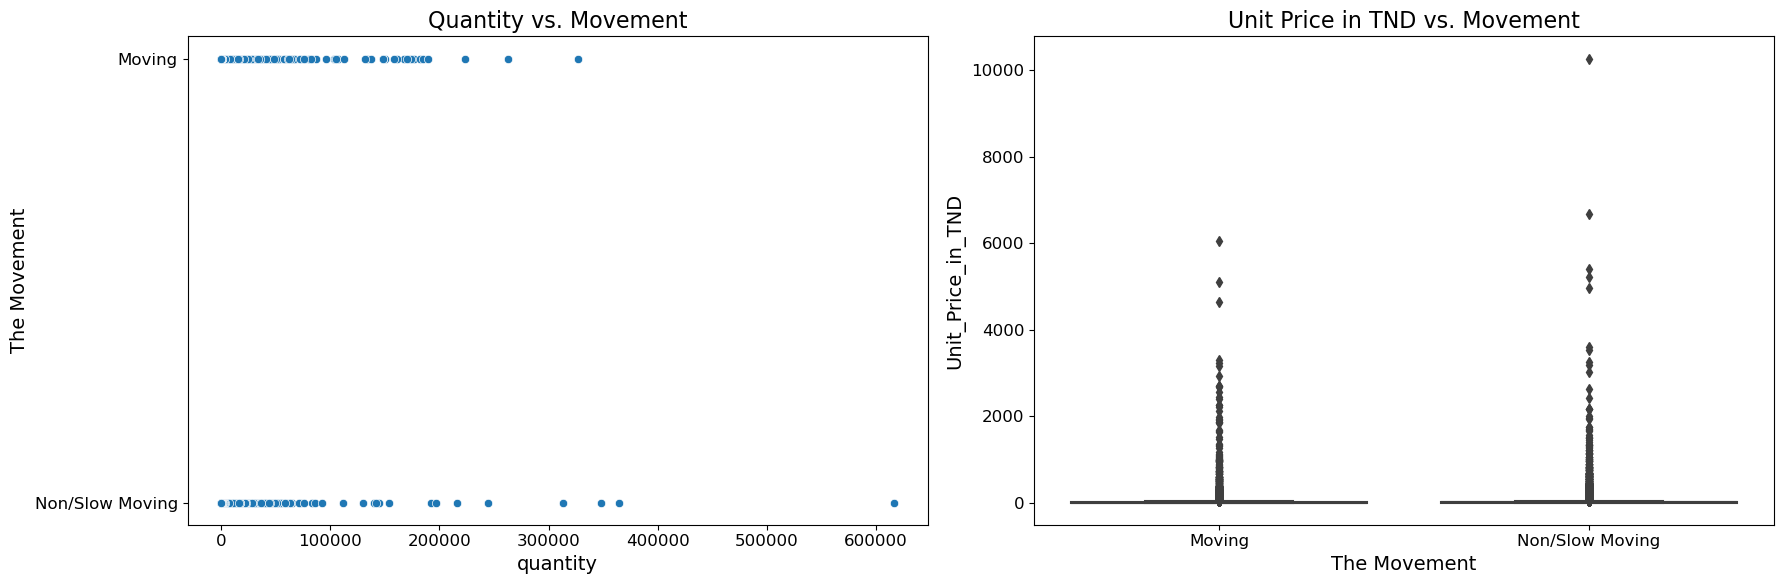

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'quantity' and 'Unit_Price_in_TND' columns are numeric, coercing errors to NaN
Consumables_and_Raw_Materials_Data['quantity'] = pd.to_numeric(Consumables_and_Raw_Materials_Data['quantity'], errors='coerce')
Consumables_and_Raw_Materials_Data['Unit_Price_in_TND'] = pd.to_numeric(Consumables_and_Raw_Materials_Data['Unit_Price_in_TND'], errors='coerce')

# Drop rows with NaN values in 'quantity' and 'Unit_Price_in_TND'
Consumables_and_Raw_Materials_Data.dropna(subset=['quantity', 'Unit_Price_in_TND'], inplace=True)

# Ensure 'The Movement' is treated as a categorical variable
Consumables_and_Raw_Materials_Data['The Movement'] = Consumables_and_Raw_Materials_Data['The Movement'].astype('category')

# Increase font sizes
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # X and Y label font size
plt.rc('xtick', labelsize=12)  # X tick label font size
plt.rc('ytick', labelsize=12)  # Y tick label font size
plt.rc('legend', fontsize=12)  # Legend font size
plt.rc('font', size=12)        # General font size

# Scatter plot for Quantity vs. Movement
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='quantity', y='The Movement', data=Consumables_and_Raw_Materials_Data)
plt.title('Quantity vs. Movement')

# Box plot for Unit Price in TND vs. Movement
plt.subplot(1, 2, 2)
sns.boxplot(x='The Movement', y='Unit_Price_in_TND', data=Consumables_and_Raw_Materials_Data)
plt.title('Unit Price in TND vs. Movement')

plt.tight_layout()
plt.show()





In [31]:
fabric_rows = Consumables_and_Raw_Materials_Data[Consumables_and_Raw_Materials_Data['type'] == 'Fabric'].head(4)
print(fabric_rows)

         type          ID                                        NAME  \
23835  Fabric  10DNR130PJ             DENIMER R367 JORDAN GLAMOR BLUE   
23836  Fabric  10SWI153TO   SWIFT ULTRA POWER 12 SILVER BLUE POST REC   
23837  Fabric  10BOS237EM                 BOSSA MD 3938-A STR REGULAR   
23838  Fabric  10BOS238TC                         BOSSA HERLEEN BLUES   

       Unit_Price_in_TND  quantity  Stock Movement Class     The Movement  
23835            0.16551       4.0                   4.0  Non/Slow Moving  
23836            0.16551      14.0                   4.0  Non/Slow Moving  
23837            1.65510       4.0                   4.0  Non/Slow Moving  
23838            1.65510       5.0                   4.0  Non/Slow Moving  


## Outlier Removal and Visualization

This section calculates the Interquartile Range (IQR) to identify and remove outliers in the `Unit_Price_in_TND` column, and then visualizes the filtered data:

1. **Calculate IQR:** Compute the Interquartile Range for `Unit_Price_in_TND` to determine outlier thresholds.
2. **Remove Outliers:** Filter out data points that fall outside the calculated IQR bounds.
3. **Create Visualizations:**
   - Scatter plot of `Quantity` vs. `The Movement` after outlier removal
   - Box plot of `Unit Price in TND` vs. `The Movement` after outlier removal


C:\Users\Skander\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


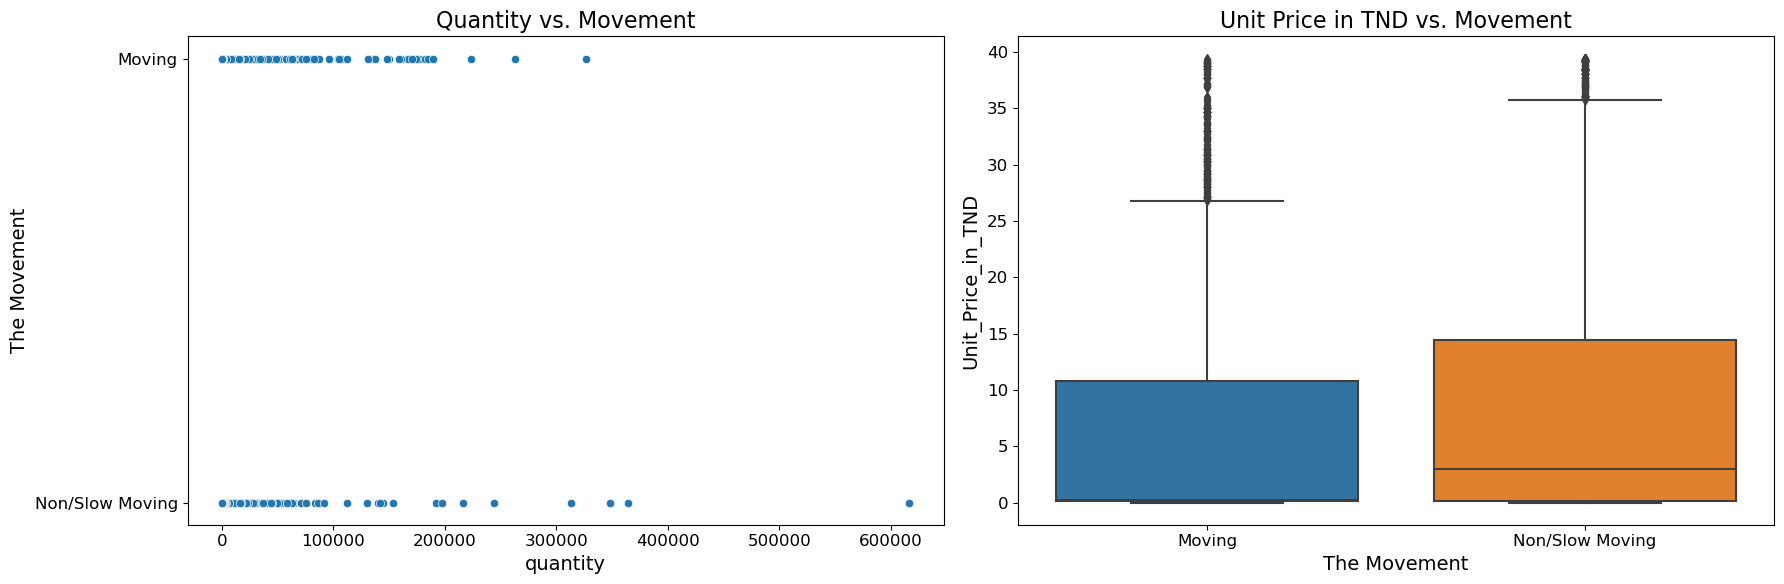

In [32]:
import numpy as np

# Calculate the IQR for Unit_Price_in_TND
Q1 = Consumables_and_Raw_Materials_Data['Unit_Price_in_TND'].quantile(0.25)
Q3 = Consumables_and_Raw_Materials_Data['Unit_Price_in_TND'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers in Unit_Price_in_TND
filtered_data = Consumables_and_Raw_Materials_Data[
    (Consumables_and_Raw_Materials_Data['Unit_Price_in_TND'] >= lower_bound) &
    (Consumables_and_Raw_Materials_Data['Unit_Price_in_TND'] <= upper_bound)
]

# Increase font sizes
plt.rc('axes', titlesize=16)  # Title font size
plt.rc('axes', labelsize=14)  # X and Y label font size
plt.rc('xtick', labelsize=12)  # X tick label font size
plt.rc('ytick', labelsize=12)  # Y tick label font size
plt.rc('legend', fontsize=12)  # Legend font size
plt.rc('font', size=12)        # General font size

# Plot the data after removing outliers
plt.figure(figsize=(18, 6))

# Scatter plot for Quantity vs. The Movement
plt.subplot(1, 2, 1)
sns.scatterplot(x='quantity', y='The Movement', data=filtered_data)
plt.title('Quantity vs. Movement')

# Box plot for Unit Price in TND vs. The Movement
plt.subplot(1, 2, 2)
sns.boxplot(x='The Movement', y='Unit_Price_in_TND', data=filtered_data)
plt.title('Unit Price in TND vs. Movement')

plt.tight_layout()
plt.show()



In [33]:
fabric_rows = filtered_data[filtered_data['type'] == 'Fabric'].head(4)
print(fabric_rows)

         type          ID                                        NAME  \
23835  Fabric  10DNR130PJ             DENIMER R367 JORDAN GLAMOR BLUE   
23836  Fabric  10SWI153TO   SWIFT ULTRA POWER 12 SILVER BLUE POST REC   
23837  Fabric  10BOS237EM                 BOSSA MD 3938-A STR REGULAR   
23838  Fabric  10BOS238TC                         BOSSA HERLEEN BLUES   

       Unit_Price_in_TND  quantity  Stock Movement Class     The Movement  
23835            0.16551       4.0                   4.0  Non/Slow Moving  
23836            0.16551      14.0                   4.0  Non/Slow Moving  
23837            1.65510       4.0                   4.0  Non/Slow Moving  
23838            1.65510       5.0                   4.0  Non/Slow Moving  


## Correlation Analysis

This section computes the correlation matrix for numeric variables in the filtered data and visualizes it using a heatmap:

1. **Select Numeric Columns:** Identify numeric columns in the filtered data.
2. **Compute Correlation Matrix:** Calculate the correlations between numeric variables.
3. **Create Heatmap:** Visualize the correlation matrix with a heatmap.


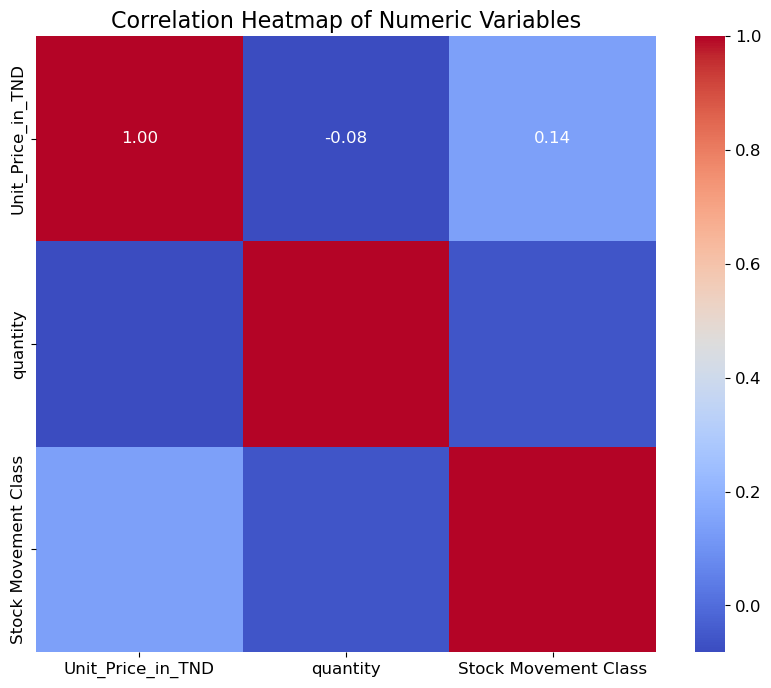

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = filtered_data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [35]:
print(filtered_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 33263 entries, 0 to 35963
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  33263 non-null  object  
 1   ID                    33263 non-null  object  
 2   NAME                  33263 non-null  object  
 3   Unit_Price_in_TND     33263 non-null  float64 
 4   quantity              33263 non-null  float64 
 5   Stock Movement Class  33263 non-null  float64 
 6   The Movement          33263 non-null  category
dtypes: category(1), float64(3), object(3)
memory usage: 1.8+ MB
None


In [36]:
import pandas as pd

# Assuming filtered_data is already defined

# Using .loc to convert 'quantity' column to float64 and avoid SettingWithCopyWarning
filtered_data.loc[:, 'quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Verify the changes
print(filtered_data.dtypes)



type                      object
ID                        object
NAME                      object
Unit_Price_in_TND        float64
quantity                 float64
Stock Movement Class     float64
The Movement            category
dtype: object


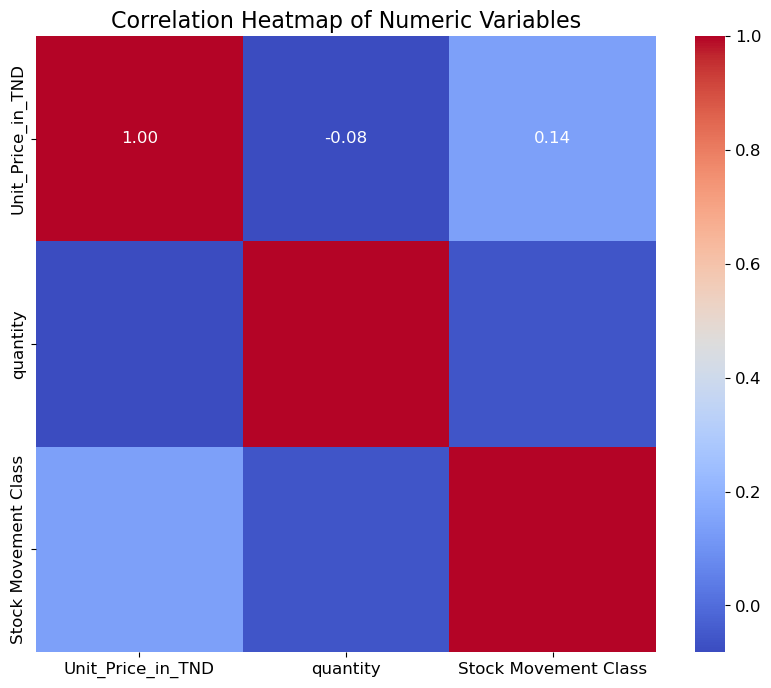

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = filtered_data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [38]:
fabric_rows = filtered_data[filtered_data['type'] == 'Fabric'].head(4)
print(fabric_rows)

         type          ID                                        NAME  \
23835  Fabric  10DNR130PJ             DENIMER R367 JORDAN GLAMOR BLUE   
23836  Fabric  10SWI153TO   SWIFT ULTRA POWER 12 SILVER BLUE POST REC   
23837  Fabric  10BOS237EM                 BOSSA MD 3938-A STR REGULAR   
23838  Fabric  10BOS238TC                         BOSSA HERLEEN BLUES   

       Unit_Price_in_TND  quantity  Stock Movement Class     The Movement  
23835            0.16551       4.0                   4.0  Non/Slow Moving  
23836            0.16551      14.0                   4.0  Non/Slow Moving  
23837            1.65510       4.0                   4.0  Non/Slow Moving  
23838            1.65510       5.0                   4.0  Non/Slow Moving  


## Kruskal-Wallis Test for Group Comparison

This section performs the Kruskal-Wallis test to compare `quantity` and `Unit_Price_in_TND` across different `Movement` groups:

1. **Group Data:** Group the data by `The Movement` and collect `quantity` and `Unit_Price_in_TND` values for each group.
2. **Perform Kruskal-Wallis Test:** Conduct the test to determine if there are statistically significant differences between the groups.
3. **Display Results:** Print the H-statistic and p-value for both `quantity` and `Unit_Price_in_TND`.


In [39]:
from scipy.stats import kruskal

# Assume supply_data is already loaded
# Group data by 'Stock Movement Class' and collect values for each group
quantity_groups = [group['quantity'].values for name, group in filtered_data.groupby('The Movement')]
unit_price_groups = [group['Unit_Price_in_TND'].values for name, group in filtered_data.groupby('The Movement')]

# Perform Kruskal-Wallis test
kw_quantity = kruskal(*quantity_groups)
kw_unit_price = kruskal(*unit_price_groups)

print(f"Kruskal-Wallis result for Quantity: H-statistic = {kw_quantity.statistic}, p-value = {kw_quantity.pvalue}")
print(f"Kruskal-Wallis result for Unit Price in TND: H-statistic = {kw_unit_price.statistic}, p-value = {kw_unit_price.pvalue}")

Kruskal-Wallis result for Quantity: H-statistic = 1202.4204880892767, p-value = 1.8166028439027374e-263
Kruskal-Wallis result for Unit Price in TND: H-statistic = 848.5546042335611, p-value = 1.4989900580196102e-186


C:\Users\Skander\AppData\Local\Temp\ipykernel_13532\983117266.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_groups = [group['quantity'].values for name, group in filtered_data.groupby('The Movement')]
C:\Users\Skander\AppData\Local\Temp\ipykernel_13532\983117266.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unit_price_groups = [group['Unit_Price_in_TND'].values for name, group in filtered_data.groupby('The Movement')]


In [40]:
fabric_rows = filtered_data[filtered_data['type'] == 'Fabric'].head(4)
print(fabric_rows)

         type          ID                                        NAME  \
23835  Fabric  10DNR130PJ             DENIMER R367 JORDAN GLAMOR BLUE   
23836  Fabric  10SWI153TO   SWIFT ULTRA POWER 12 SILVER BLUE POST REC   
23837  Fabric  10BOS237EM                 BOSSA MD 3938-A STR REGULAR   
23838  Fabric  10BOS238TC                         BOSSA HERLEEN BLUES   

       Unit_Price_in_TND  quantity  Stock Movement Class     The Movement  
23835            0.16551       4.0                   4.0  Non/Slow Moving  
23836            0.16551      14.0                   4.0  Non/Slow Moving  
23837            1.65510       4.0                   4.0  Non/Slow Moving  
23838            1.65510       5.0                   4.0  Non/Slow Moving  


## Random Forest Classification for Movement Prediction

This section builds a Random Forest classifier to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Split the Data:** Split the data into training and testing sets (80% train, 20% test).
5. **Train the Model:** Initialize and train a Random Forest classifier.
6. **Make Predictions:** Predict the target variable on the test set.
7. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)

y = filtered_data['The Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))



C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\1359729394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\1359729394.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Accuracy: 0.76
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.64      0.57      0.60      2088
Non/Slow Moving       0.81      0.85      0.83      4565

       accuracy                           0.76      6653
      macro avg       0.73      0.71      0.72      6653
   weighted avg       0.76      0.76      0.76      6653



In [164]:
fabric_rows = filtered_data[filtered_data['type'] == 'Supply'].head(4)
print(fabric_rows)

     type                       ID                                      NAME  \
0  Supply  TJ109128 SKAT CARP JEAN   100*205 100%REC-CO skater carpenter jea   
1  Supply             CL/RV STRASS  Stud rivet Strass Etam Silver+Ant Copper   
2  Supply              UDT WL 0028             NON ECO woven sticker 30/50mm   
3  Supply                 C1367/80       Coats Dual Duty tex 80 C1367 5000 m   

   Unit_Price_in_TND  quantity  Stock Movement Class The Movement  
0           0.397224       7.0                   1.0       Moving  
1           0.033102   12818.0                   1.0       Moving  
2           0.095334    6179.0                   1.0       Moving  
3          14.664186      30.0                   1.0       Moving  


## Confusion Matrix for Model Evaluation

This section plots the confusion matrix to evaluate the performance of the Random Forest classifier:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


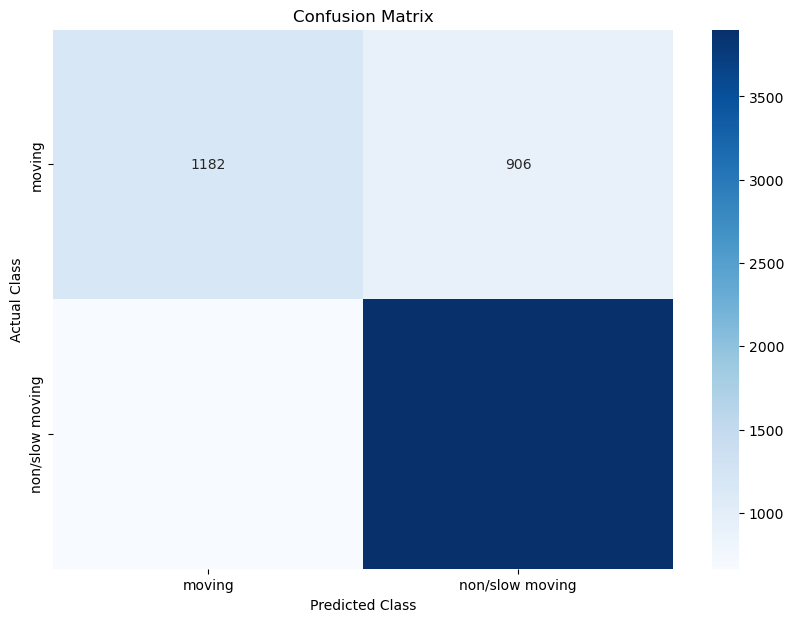

In [165]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [166]:
filtered_data.head(5)

,type,ID,NAME,Unit_Price_in_TND,quantity,Stock Movement Class,The Movement
0,Supply,TJ109128 SKAT CARP JEAN,100*205 100%REC-CO skater carpenter jea,0.397224,7.0,1.0,Moving
1,Supply,CL/RV STRASS,Stud rivet Strass Etam Silver+Ant Copper,0.033102,12818.0,1.0,Moving
2,Supply,UDT WL 0028,NON ECO woven sticker 30/50mm,0.095334,6179.0,1.0,Moving
3,Supply,C1367/80,Coats Dual Duty tex 80 C1367 5000 m,14.664186,30.0,1.0,Moving
4,Supply,CL/040184 BLK 8.3MM SHIN,Nail Rivet 040184 black 8.3mm Shiny,0.033102,200.0,4.0,Non/Slow Moving


In [167]:
fabric_rows = filtered_data[filtered_data['type'] == 'Fabric'].head(4)
print(fabric_rows)


         type          ID                                        NAME  \
23835  Fabric  10DNR130PJ             DENIMER R367 JORDAN GLAMOR BLUE   
23836  Fabric  10SWI153TO   SWIFT ULTRA POWER 12 SILVER BLUE POST REC   
23837  Fabric  10BOS237EM                 BOSSA MD 3938-A STR REGULAR   
23838  Fabric  10BOS238TC                         BOSSA HERLEEN BLUES   

       Unit_Price_in_TND  quantity  Stock Movement Class     The Movement  
23835            0.16551       4.0                   4.0  Non/Slow Moving  
23836            0.16551      14.0                   4.0  Non/Slow Moving  
23837            1.65510       4.0                   4.0  Non/Slow Moving  
23838            1.65510       5.0                   4.0  Non/Slow Moving  


## Hyperparameter Tuning with GridSearchCV

This section uses GridSearchCV to find the best hyperparameters for the Random Forest classifier and evaluates the optimized model:

1. **Define Parameter Grid:** Set up a grid of hyperparameters to search over, including `n_estimators`, `max_features`, `max_depth`, and `class_weight`.
2. **Initialize GridSearchCV:** Configure GridSearchCV with the Random Forest classifier, the parameter grid, 5-fold cross-validation, and accuracy as the scoring metric.
3. **Train with GridSearchCV:** Fit the model using the training data to find the best hyperparameters.
4. **Evaluate the Best Model:** Print the best hyperparameters, make predictions, and evaluate the model's performance with accuracy and a classification report.


In [168]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [1, 'log2', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'class_weight': ['balanced']
}

# Initialize and train the Random Forest classifier with GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}
Accuracy: 0.76
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.62      0.63      0.62      2088
Non/Slow Moving       0.83      0.83      0.83      4565

       accuracy                           0.76      6653
      macro avg       0.73      0.73      0.73      6653
   weighted avg       0.76      0.76      0.76      6653



## Confusion Matrix for Optimized Model

This section plots the confusion matrix to evaluate the performance of the Random Forest classifier after hyperparameter tuning:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the optimized model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


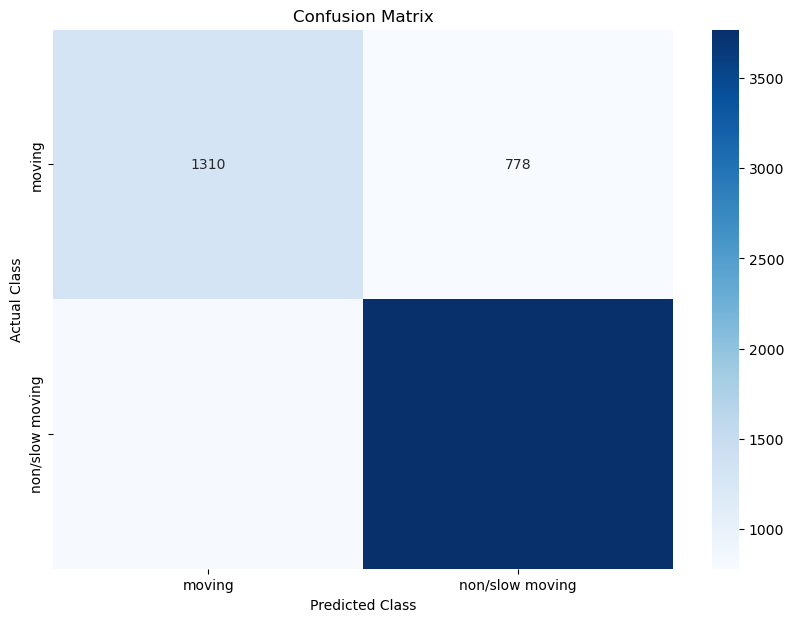

In [169]:
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Gradient Boosting Classification for Movement Prediction

This section builds a Gradient Boosting classifier to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Split the Data:** Split the data into training and testing sets (80% train, 20% test).
5. **Train the Model:** Initialize and train a Gradient Boosting classifier.
6. **Make Predictions:** Predict the target variable on the test set.
7. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [170]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)

y = filtered_data['The Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2843112888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2843112888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Accuracy: 0.75
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.74      0.33      0.45      2088
Non/Slow Moving       0.75      0.95      0.84      4565

       accuracy                           0.75      6653
      macro avg       0.75      0.64      0.65      6653
   weighted avg       0.75      0.75      0.72      6653



## Confusion Matrix for Gradient Boosting Model

This section plots the confusion matrix to evaluate the performance of the Gradient Boosting classifier:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the Gradient Boosting model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


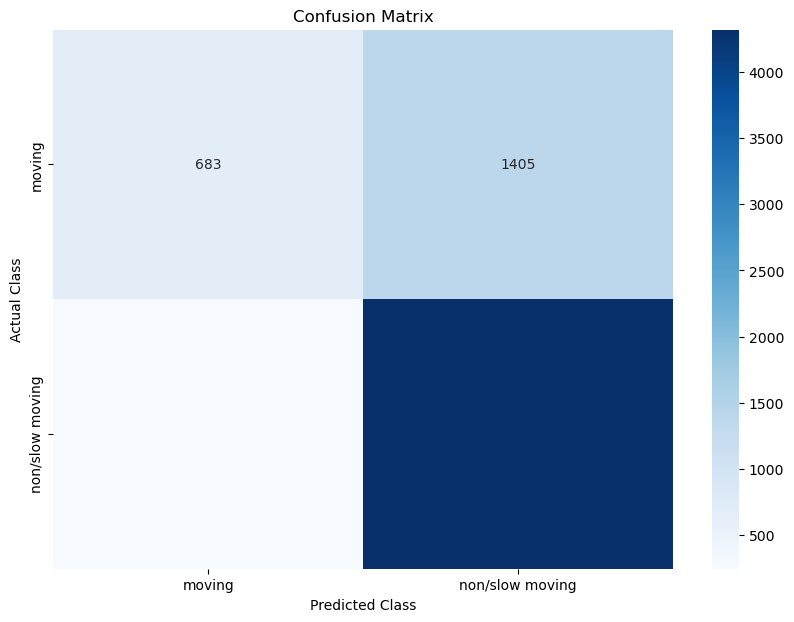

In [171]:
conf_matrix3 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Hyperparameter Tuning with GridSearchCV for Gradient Boosting

This section uses GridSearchCV to find the best hyperparameters for the Gradient Boosting classifier and evaluates the optimized model:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Split the Data:** Split the data into training and testing sets (80% train, 20% test).
5. **Calculate Class Weights:** Handle imbalanced classes by computing class weights.
6. **Initialize GridSearchCV:** Configure GridSearchCV with the Gradient Boosting classifier, the parameter grid, 5-fold cross-validation, and accuracy as the scoring metric.
7. **Train with GridSearchCV:** Fit the model using the training data and class weights to find the best hyperparameters.
8. **Evaluate the Best Model:** Print the best hyperparameters, make predictions, and evaluate the model's performance with accuracy and a classification report.


In [172]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)

y = filtered_data['The Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to handle imbalanced classes
class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train, sample_weight=class_weights)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\1667368284.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\1667368284.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Best Parameters: {'learning_rate': 0.2, 'max_features': None, 'n_estimators': 200}
Accuracy: 0.74
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.57      0.75      0.65      2088
Non/Slow Moving       0.87      0.74      0.80      4565

       accuracy                           0.74      6653
      macro avg       0.72      0.74      0.72      6653
   weighted avg       0.77      0.74      0.75      6653



## Confusion Matrix for Optimized Gradient Boosting Model

This section plots the confusion matrix to evaluate the performance of the Gradient Boosting classifier after hyperparameter tuning:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the optimized Gradient Boosting model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


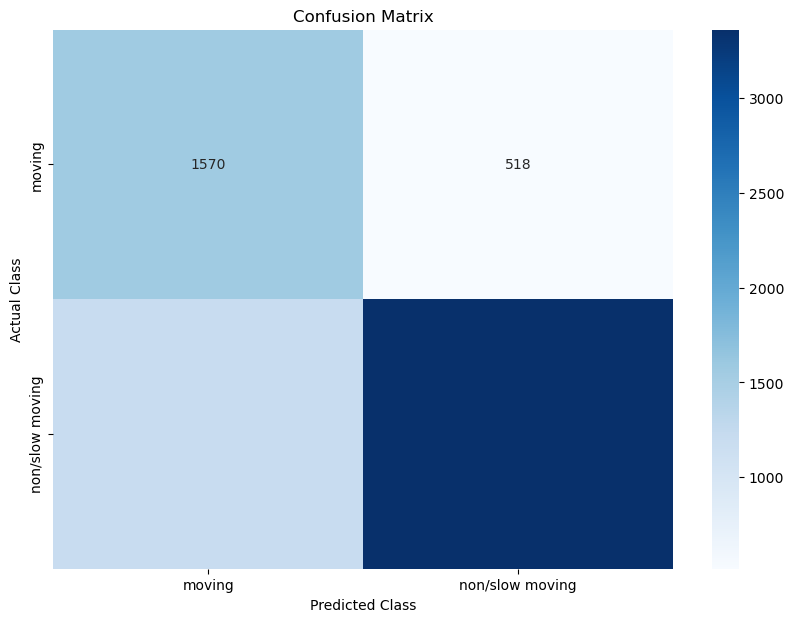

In [173]:
conf_matrix4 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Logistic Regression Classification for Movement Prediction

This section builds a Logistic Regression classifier to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Split the Data:** Split the data into training and testing sets (80% train, 20% test).
5. **Train the Model:** Initialize and train a Logistic Regression classifier.
6. **Make Predictions:** Predict the target variable on the test set.
7. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [174]:
from sklearn.linear_model import LogisticRegression

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)

y = filtered_data['The Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)
log_reg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2328987285.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2328987285.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Accuracy: 0.69
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.58      0.01      0.01      2088
Non/Slow Moving       0.69      1.00      0.81      4565

       accuracy                           0.69      6653
      macro avg       0.63      0.50      0.41      6653
   weighted avg       0.65      0.69      0.56      6653



## Confusion Matrix for Logistic Regression Model

This section plots the confusion matrix to evaluate the performance of the Logistic Regression classifier:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the Logistic Regression model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


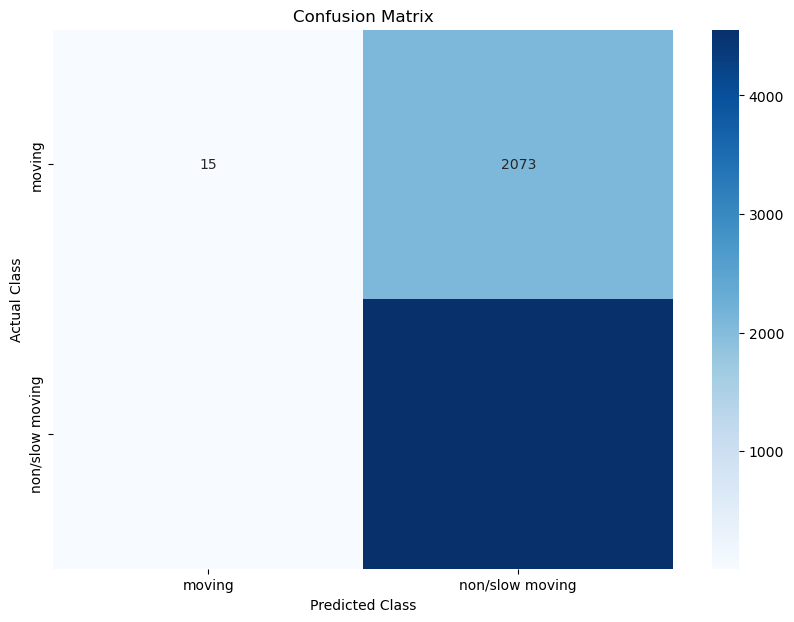

In [175]:
conf_matrix5 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix5, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Logistic Regression with Cross-Validation for Movement Prediction

This section builds a Logistic Regression classifier with cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Split the Data:** Split the data into training and testing sets (80% train, 20% test).
5. **Train the Model with Cross-Validation:** Initialize and train a Logistic Regression classifier with 5-fold cross-validation.
6. **Make Predictions:** Predict the target variable on the test set.
7. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [176]:
from sklearn.linear_model import LogisticRegressionCV

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)

y = filtered_data['The Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression classifier with cross-validation
log_reg_classifier = LogisticRegressionCV(max_iter=1000, random_state=42, cv=5)
log_reg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2388760229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2388760229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Accuracy: 0.69
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.58      0.01      0.01      2088
Non/Slow Moving       0.69      1.00      0.81      4565

       accuracy                           0.69      6653
      macro avg       0.63      0.50      0.41      6653
   weighted avg       0.65      0.69      0.56      6653



## Confusion Matrix for Logistic Regression with Cross-Validation

This section plots the confusion matrix to evaluate the performance of the Logistic Regression classifier with cross-validation:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the Logistic Regression model with cross-validation.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


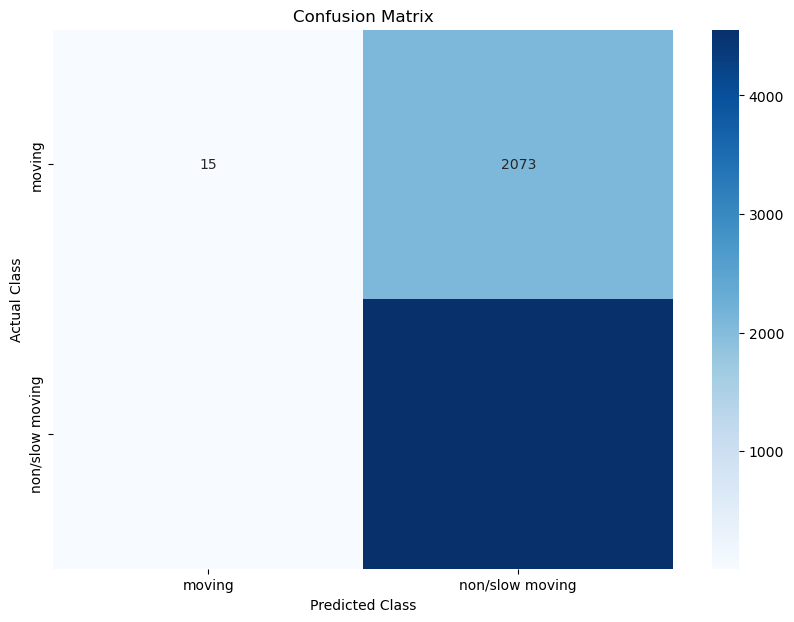

In [177]:
conf_matrix6 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix6, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## K-Nearest Neighbors Classification for Movement Prediction

This section builds a K-Nearest Neighbors (KNN) classifier to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Split the Data:** Split the data into training and testing sets (80% train, 20% test).
5. **Train the Model:** Initialize and train a K-Nearest Neighbors classifier.
6. **Make Predictions:** Predict the target variable on the test set.
7. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [178]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)

y = filtered_data['The Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\256251112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\256251112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Accuracy: 0.69
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.50      0.39      0.44      2088
Non/Slow Moving       0.75      0.82      0.78      4565

       accuracy                           0.69      6653
      macro avg       0.63      0.61      0.61      6653
   weighted avg       0.67      0.69      0.68      6653



## Confusion Matrix for K-Nearest Neighbors Model

This section plots the confusion matrix to evaluate the performance of the K-Nearest Neighbors classifier:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the K-Nearest Neighbors model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


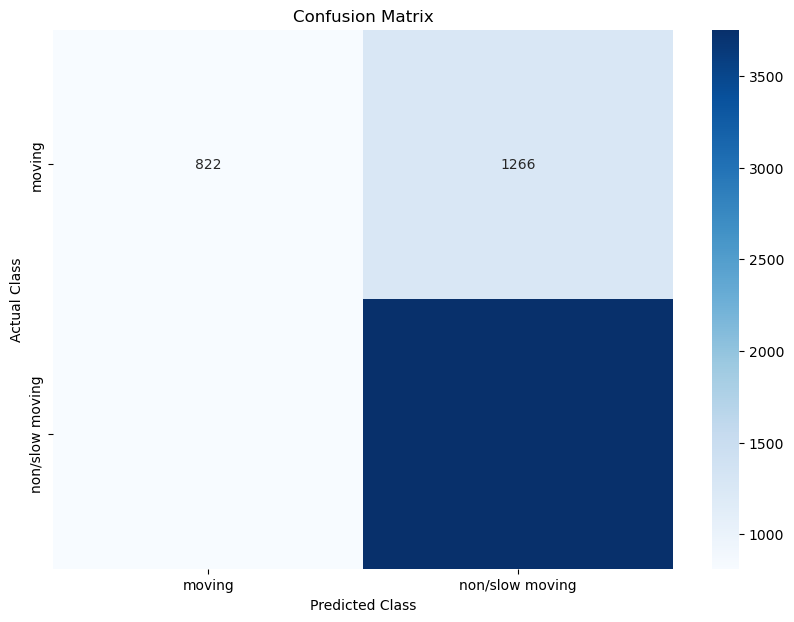

In [179]:
conf_matrix7 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix7, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## K-Nearest Neighbors Classification with Cross-Validation

This section builds a K-Nearest Neighbors (KNN) classifier with cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Initialize KNN Classifier:** Initialize the K-Nearest Neighbors classifier.
5. **Perform Cross-Validation:** Conduct 5-fold cross-validation and print the cross-validation scores and their mean.
6. **Train the Model:** Fit the KNN model on the entire dataset.
7. **Make Predictions:** Predict the target variable on the test set.
8. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model on the entire training data
knn_classifier.fit(X, y)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\1041127705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\1041127705.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Cross-Validation Scores: [0.48188787 0.51736059 0.56831505 0.46361996 0.58974744]
Mean CV Score: 0.5241861826967773
Accuracy: 0.78
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.68      0.59      0.63      2088
Non/Slow Moving       0.82      0.87      0.85      4565

       accuracy                           0.78      6653
      macro avg       0.75      0.73      0.74      6653
   weighted avg       0.78      0.78      0.78      6653



## Confusion Matrix for K-Nearest Neighbors Model with Cross-Validation

This section plots the confusion matrix to evaluate the performance of the K-Nearest Neighbors classifier after cross-validation:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the K-Nearest Neighbors model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


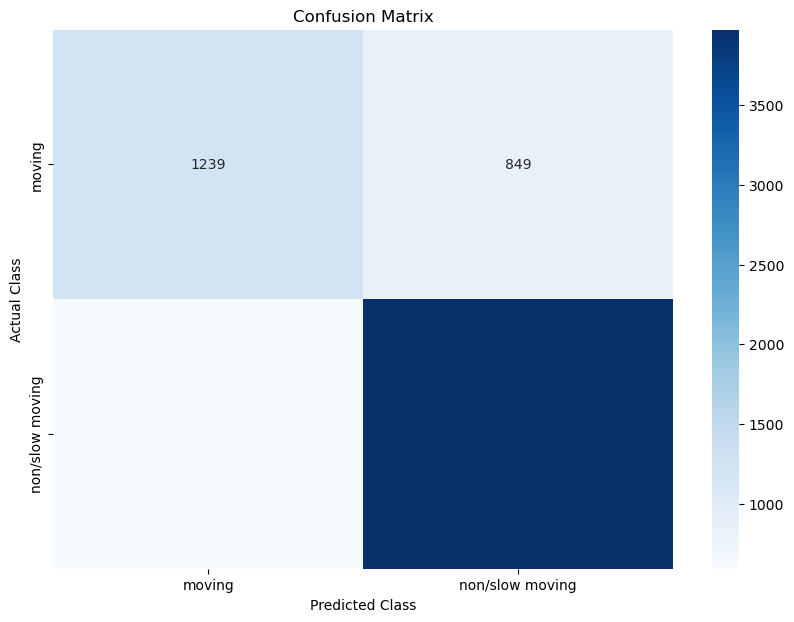

In [181]:
conf_matrix8 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix8, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## K-Nearest Neighbors Classification with Data Balancing and Cross-Validation

This section builds a K-Nearest Neighbors (KNN) classifier with data balancing and cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Data Balancing:** Use a resampling strategy (e.g., `RandomOverSampler` or `RandomUnderSampler`) to balance the dataset.
5. **Initialize KNN Classifier:** Initialize the K-Nearest Neighbors classifier.
6. **Perform Cross-Validation:** Conduct 5-fold cross-validation and print the cross-validation scores and their mean.
7. **Split Resampled Data:** Split the resampled data into training and testing sets (80% train, 20% test).
8. **Train the Model:** Fit the KNN model on the training set.
9. **Make Predictions:** Predict the target variable on the test set.
10. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [182]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Data Balancing
# Choose the resampling strategy (e.g., RandomOverSampler or RandomUnderSampler)
# oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Resample the data
# X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier()

# Cross-validation
cv_scores = cross_val_score(knn_classifier, X_resampled, y_resampled, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\3385969915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\3385969915.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Cross-Validation Scores: [0.5630352  0.44753747 0.49702593 0.53485606 0.3847252 ]
Mean CV Score: 0.4854359726288571
Accuracy: 0.63
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.62      0.66      0.64      2103
Non/Slow Moving       0.63      0.60      0.62      2101

       accuracy                           0.63      4204
      macro avg       0.63      0.63      0.63      4204
   weighted avg       0.63      0.63      0.63      4204



## Confusion Matrix for K-Nearest Neighbors Model with Data Balancing

This section plots the confusion matrix to evaluate the performance of the K-Nearest Neighbors classifier after data balancing:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the K-Nearest Neighbors model with data balancing.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


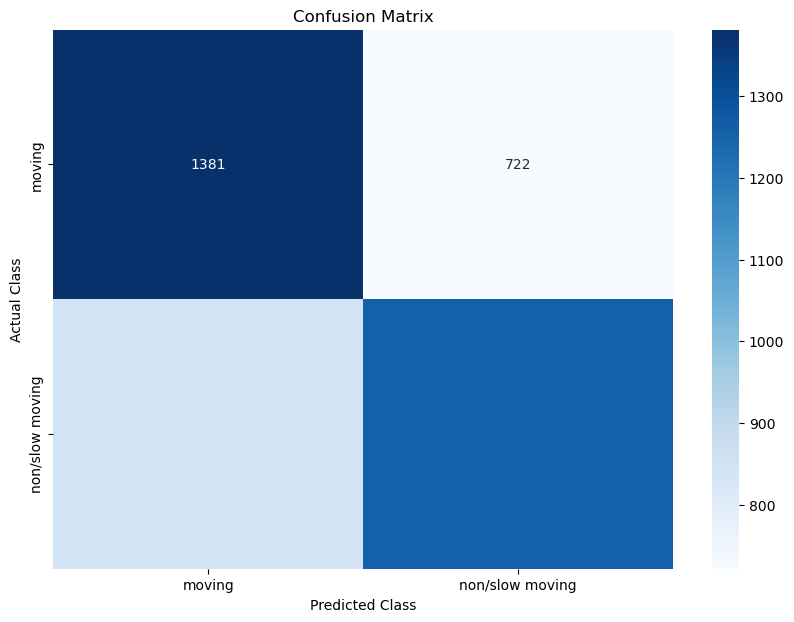

In [183]:
conf_matrix9 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix9, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Naive Bayes Classification with Data Balancing and Cross-Validation

This section builds a Naive Bayes classifier with data balancing and cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Data Balancing:** Use a resampling strategy (e.g., `RandomUnderSampler`) to balance the dataset.
5. **Initialize Naive Bayes Classifier:** Initialize the Naive Bayes classifier.
6. **Perform Cross-Validation:** Conduct 5-fold cross-validation and print the cross-validation scores and their mean.
7. **Split Resampled Data:** Split the resampled data into training and testing sets (80% train, 20% test).
8. **Train the Model:** Fit the Naive Bayes model on the training set.
9. **Make Predictions:** Predict the target variable on the test set.
10. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [184]:
from sklearn.naive_bayes import GaussianNB

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Data Balancing
# Choose the resampling strategy (e.g., RandomOverSampler or RandomUnderSampler)
undersampler = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()

# Cross-validation
cv_scores = cross_val_score(nb_classifier, X_resampled, y_resampled, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\915802586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\915802586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Cross-Validation Scores: [0.58087536 0.52200809 0.49988104 0.59933381 0.19486081]
Mean CV Score: 0.4793918213011277
Accuracy: 0.58
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.56      0.79      0.65      2103
Non/Slow Moving       0.64      0.37      0.47      2101

       accuracy                           0.58      4204
      macro avg       0.60      0.58      0.56      4204
   weighted avg       0.60      0.58      0.56      4204



## Confusion Matrix for Naive Bayes Model with Data Balancing and Cross Validation

This section plots the confusion matrix to evaluate the performance of the Naive Bayes classifier after data balancing:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the Naive Bayes model with data balancing.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


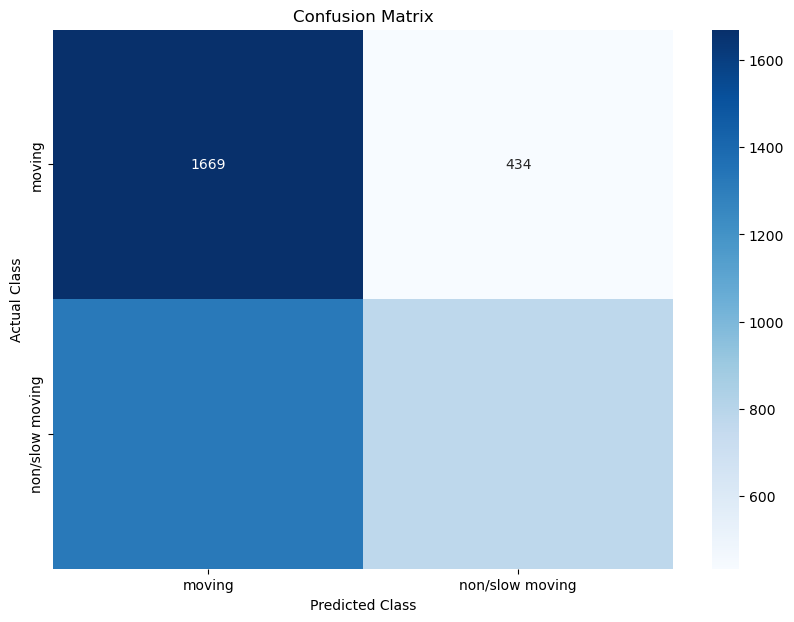

In [185]:
conf_matrix10 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix10, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Naive Bayes Classification with Data Balancing and Cross-Validation

This section builds a Naive Bayes classifier with data balancing and cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Data Balancing:** Use a resampling strategy (e.g., `RandomUnderSampler`) to balance the dataset.
5. **Initialize Naive Bayes Classifier:** Initialize the Naive Bayes classifier.
6. **Perform Cross-Validation:** Conduct 5-fold cross-validation and print the cross-validation scores and their mean.
7. **Evaluate the Model:** Print the mean cross-validation accuracy score and the classification report.


In [186]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Data Balancing
# Choose the resampling strategy (e.g., RandomUnderSampler)
undersampler = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X_resampled, y_resampled, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))



C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2714887417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\2714887417.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Cross-Validation Scores: [0.58087536 0.52200809 0.49988104 0.59933381 0.19486081]
Mean CV Score: 0.4793918213011277
Accuracy: 0.58
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.56      0.79      0.65      2103
Non/Slow Moving       0.64      0.37      0.47      2101

       accuracy                           0.58      4204
      macro avg       0.60      0.58      0.56      4204
   weighted avg       0.60      0.58      0.56      4204



## Confusion Matrix for Naive Bayes Model with Data Balancing and Cross Validation

This section plots the confusion matrix to evaluate the performance of the Naive Bayes classifier after data balancing:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the Naive Bayes model with data balancing.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


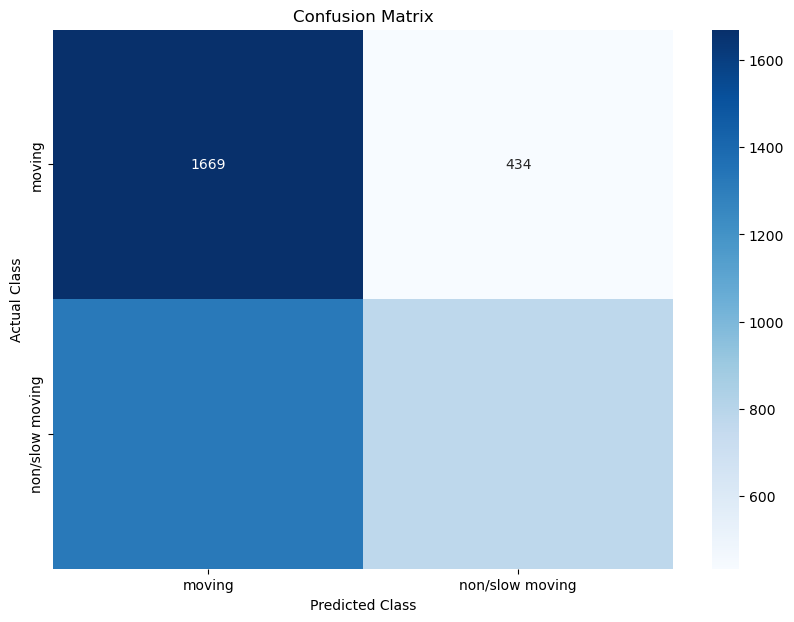

In [187]:
conf_matrix11 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix11, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## K-Nearest Neighbors Classification with Cross-Validation

This section builds a K-Nearest Neighbors (KNN) classifier with cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Initialize KNN Classifier:** Initialize the K-Nearest Neighbors classifier.
5. **Perform Cross-Validation:** Conduct 5-fold cross-validation and print the cross-validation scores and their mean.
6. **Train the Model:** Fit the KNN model on the entire dataset.
7. **Make Predictions:** Predict the target variable on the test set.
8. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model on the entire training data
knn_classifier.fit(X, y)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\308511802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\308511802.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Cross-Validation Scores: [0.48188787 0.51736059 0.56831505 0.46361996 0.58974744]
Mean CV Score: 0.5241861826967773
Accuracy: 0.73
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.81      0.59      0.68      2103
Non/Slow Moving       0.68      0.86      0.76      2101

       accuracy                           0.73      4204
      macro avg       0.74      0.73      0.72      4204
   weighted avg       0.74      0.73      0.72      4204



## Confusion Matrix for K-Nearest Neighbors Model with Cross-Validation

This section plots the confusion matrix to evaluate the performance of the K-Nearest Neighbors classifier after cross-validation:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the K-Nearest Neighbors model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


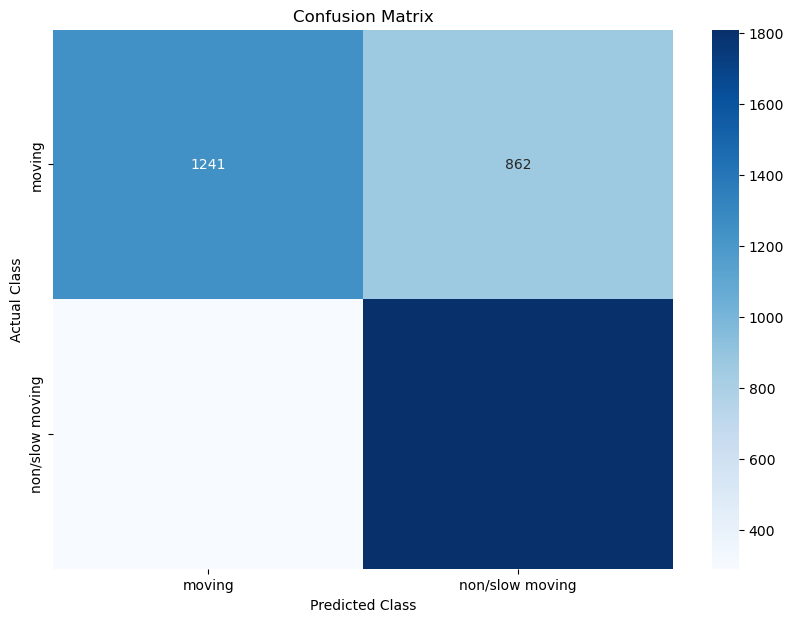

In [189]:
conf_matrix12 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix12, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## K-Nearest Neighbors Classification with Hyperparameter Tuning and Cross-Validation

This section builds a K-Nearest Neighbors (KNN) classifier with hyperparameter tuning and cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Initialize KNN Classifier:** Initialize the K-Nearest Neighbors classifier.
5. **Hyperparameter Tuning:** Perform hyperparameter tuning to find the best number of neighbors using GridSearchCV.
6. **Create a Pipeline:** Set up a pipeline with scaling and the tuned KNN classifier.
7. **Perform Cross-Validation:** Conduct 5-fold cross-validation with the pipeline and print the cross-validation scores and their mean.
8. **Train the Model:** Fit the pipeline on the entire dataset.
9. **Make Predictions:** Predict the target variable on the test set.
10. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform hyperparameter tuning for the number of neighbors
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='recall_macro')
grid_search.fit(X, y)
best_k = grid_search.best_params_['n_neighbors']
print("Best number of neighbors:", best_k)

# Create a pipeline with scaling and the tuned KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

# Perform cross-validation with the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model on the entire training data
pipeline.fit(X, y)

# Assuming X_test and y_test are already defined
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\821570990.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\821570990.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Best number of neighbors: 8
Cross-Validation Scores: [0.39816624 0.4564858  0.59777544 0.4134095  0.59951894]
Mean CV Score: 0.49307118378002623
Accuracy: 0.76
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.82      0.66      0.73      2103
Non/Slow Moving       0.72      0.85      0.78      2101

       accuracy                           0.76      4204
      macro avg       0.77      0.76      0.76      4204
   weighted avg       0.77      0.76      0.76      4204



## Confusion Matrix for Tuned K-Nearest Neighbors Model

This section plots the confusion matrix to evaluate the performance of the K-Nearest Neighbors classifier after hyperparameter tuning and cross-validation:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the tuned K-Nearest Neighbors model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


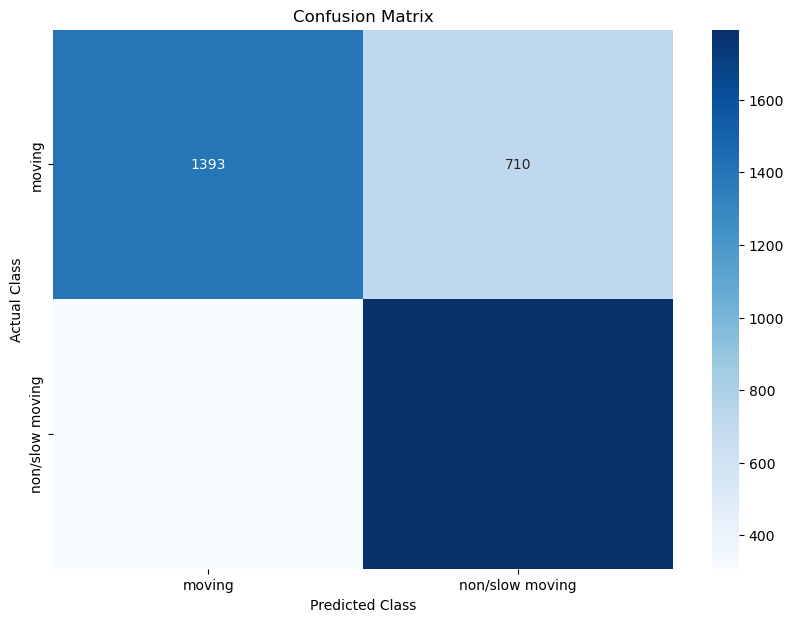

In [191]:
conf_matrix13 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix13, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Enhanced K-Nearest Neighbors Classification with Hyperparameter Tuning and Cross-Validation

This section builds an enhanced K-Nearest Neighbors (KNN) classifier with hyperparameter tuning and cross-validation to predict `The Movement` category based on `Unit_Price_in_TND` and `quantity`:

1. **Convert Columns to Numeric:** Ensure `quantity` is numeric and drop rows with NaN values in this column.
2. **Encode Categorical Variables:** Convert the `type` column to dummy variables.
3. **Define Features and Target:** Set the features as `Unit_Price_in_TND`, `quantity`, and encoded `type` columns, and the target as `The Movement`.
4. **Initialize KNN Classifier:** Initialize the K-Nearest Neighbors classifier.
5. **Hyperparameter Tuning:** Perform hyperparameter tuning for `n_neighbors`, `weights`, and `metric` using GridSearchCV.
6. **Create a Pipeline:** Set up a pipeline with scaling and the tuned KNN classifier.
7. **Perform Cross-Validation:** Conduct 5-fold cross-validation with the pipeline and print the cross-validation scores and their mean.
8. **Train the Model:** Fit the pipeline on the entire dataset.
9. **Make Predictions:** Predict the target variable on the test set.
10. **Evaluate the Model:** Calculate the accuracy and print the classification report.


In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform hyperparameter tuning for the number of neighbors
param_grid = {'n_neighbors': range(1, 31),
             'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='recall_macro')
grid_search.fit(X, y)
best_k = grid_search.best_params_['n_neighbors']
print("Best number of neighbors:", best_k)

# Create a pipeline with scaling and the tuned KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

# Perform cross-validation with the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model on the entire training data
pipeline.fit(X, y)

# Assuming X_test and y_test are already defined
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\3181065427.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\3181065427.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Best number of neighbors: 6
Cross-Validation Scores: [0.39019991 0.48278972 0.59056065 0.42303067 0.59425737]
Mean CV Score: 0.49616766234882526
Accuracy: 0.78
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.81      0.73      0.77      2103
Non/Slow Moving       0.75      0.83      0.79      2101

       accuracy                           0.78      4204
      macro avg       0.78      0.78      0.78      4204
   weighted avg       0.78      0.78      0.78      4204



## Confusion Matrix for Enhanced K-Nearest Neighbors Model

This section plots the confusion matrix to evaluate the performance of the enhanced K-Nearest Neighbors classifier after hyperparameter tuning and cross-validation:

1. **Compute Confusion Matrix:** Calculate the confusion matrix using the actual and predicted values from the enhanced K-Nearest Neighbors model.
2. **Plot Confusion Matrix:** Create a heatmap to visualize the confusion matrix, with labels for the classes.


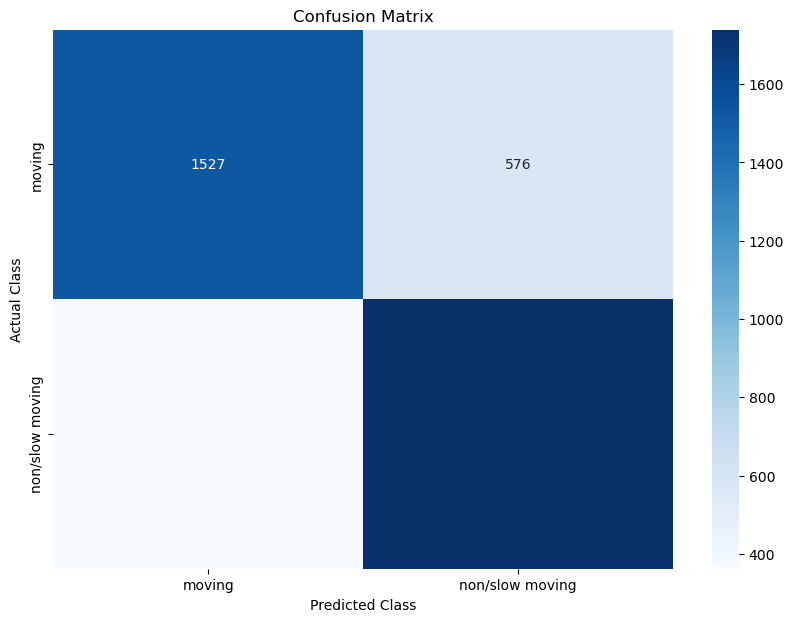

In [193]:
conf_matrix14 = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix14, annot=True, fmt="d", cmap="Blues", xticklabels=["moving","non/slow moving"], yticklabels=["moving","non/slow moving"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Feature Importance for KNN Model

This markdown visualizes the feature importance of the KNN model (our chosen model) using permutation importance.

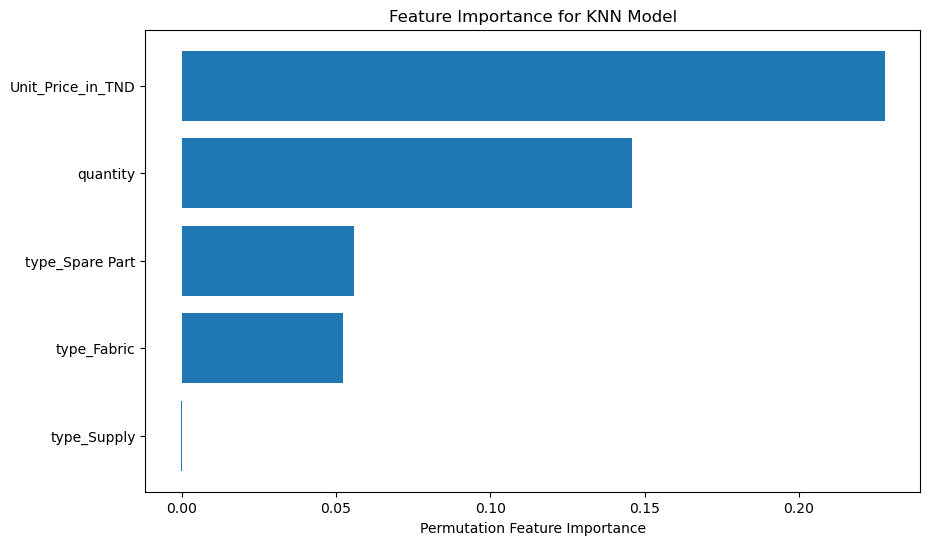

In [194]:
from sklearn.inspection import permutation_importance

result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

import matplotlib.pyplot as plt

feature_names = X.columns
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Feature Importance')
plt.title('Feature Importance for KNN Model')
plt.show()



## Evaluation Metrics for KNN Model Classification

This markdown provides an overview of the evaluation metrics used to assess the performance of the model.

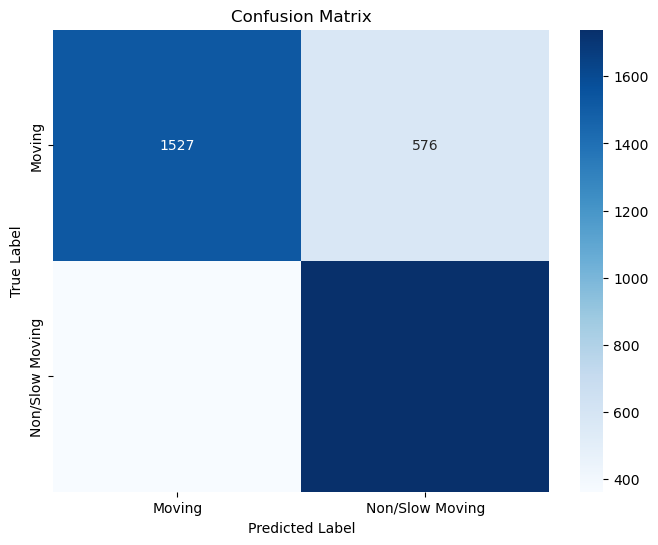

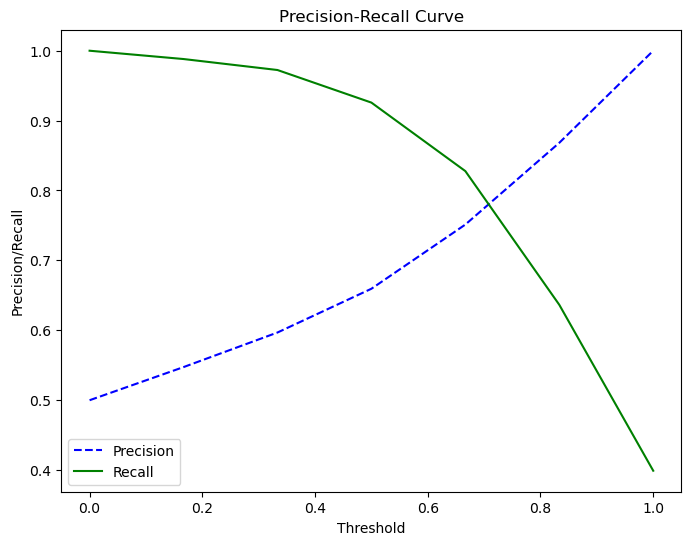

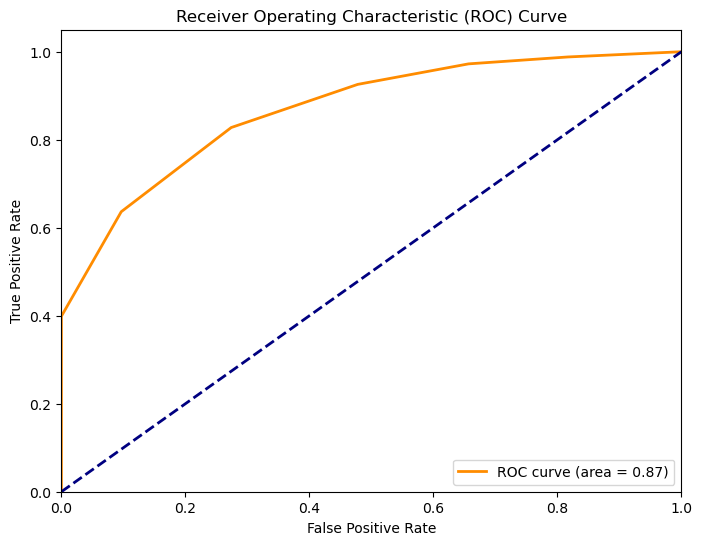

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

# Assuming y_test and y_pred are already defined

# Encode the labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Get the probabilities of the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Plot Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test_encoded, y_scores, pos_label=label_encoder.transform(['Non/Slow Moving'])[0])
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores, pos_label=label_encoder.transform(['Non/Slow Moving'])[0])
roc_auc = roc_auc_score(y_test_encoded, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Additional Evaluation Metrics for KNN Model Classification

This markdown expands on the previous evaluation metrics by calculating and visualizing the False Negative Rate (FNR) and True Negative Rate (TNR).

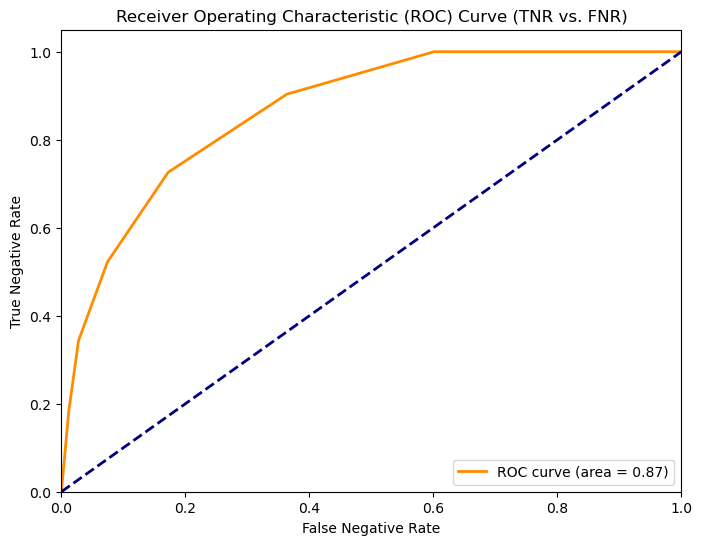

In [196]:
# Calculate FNR and TNR
fnr = 1 - tpr
tnr = 1 - fpr

# Calculate AUC
roc_auc = roc_auc_score(y_test_encoded, y_scores)

# Plot TNR vs FNR ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fnr, tnr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Negative Rate')
plt.ylabel('True Negative Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (TNR vs. FNR)')
plt.legend(loc="lower right")
plt.show()

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Assuming filtered_data is already defined

# Convert 'quantity' column to numeric
filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')

# Drop rows with NaN values in 'quantity'
filtered_data.dropna(subset=['quantity'], inplace=True)

encoded_type = pd.get_dummies(filtered_data['type'], prefix='type')

# Define the features and the target
X = pd.concat([filtered_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)
y = filtered_data['The Movement']

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform hyperparameter tuning for the number of neighbors
param_grid = {'n_neighbors': range(1, 31),
             'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='recall_macro')
grid_search.fit(X, y)
best_k = grid_search.best_params_['n_neighbors']
print("Best number of neighbors:", best_k)

# Create a pipeline with scaling and the tuned KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

# Perform cross-validation with the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model on the entire training data
pipeline.fit(X, y)

# Assuming X_test and y_test are already defined
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\3181065427.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['quantity'] = pd.to_numeric(filtered_data['quantity'], errors='coerce')
C:\Users\Skander\AppData\Local\Temp\ipykernel_18088\3181065427.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(subset=['quantity'], inplace=True)


Best number of neighbors: 6
Cross-Validation Scores: [0.39019991 0.48278972 0.59056065 0.42303067 0.59425737]
Mean CV Score: 0.49616766234882526
Accuracy: 0.78
Classification Report:
                 precision    recall  f1-score   support

         Moving       0.81      0.73      0.77      2103
Non/Slow Moving       0.75      0.83      0.79      2101

       accuracy                           0.78      4204
      macro avg       0.78      0.78      0.78      4204
   weighted avg       0.78      0.78      0.78      4204



In [198]:
# Assuming filtered_data is already defined
column_names = filtered_data.columns
print("Column names of filtered_data:")
print(column_names)


Column names of filtered_data:
Index(['type', 'ID', 'NAME', 'Unit_Price_in_TND', 'quantity',
       'Stock Movement Class', 'The Movement'],
      dtype='object')


## KNN Model Evaluation and Prediction on New Data

This markdown showcases the evaluation of a KNN model using various metrics and demonstrates prediction on a newly generated dataset.

In [218]:
# Generate a new small dataset with random values
new_data = pd.DataFrame({
    'Unit_Price_in_TND': np.random.uniform(low=0, high=6, size=500),
    'quantity': np.random.randint(low=50, high=1000, size=500),
    'type': np.random.choice(['Supply', 'Fabric', 'Spare Part'], size=500)
})

# Convert 'type' column to dummy variables
encoded_type = pd.get_dummies(new_data['type'], prefix='type')

# Combine the new data with the encoded type columns
new_x = pd.concat([new_data[['Unit_Price_in_TND', 'quantity']], encoded_type], axis=1)



new_predictions = pipeline.predict(new_x)

# Print the predictions
print("Predictions on the new dataset:")
print(new_predictions)


Predictions on the new dataset:
['Moving' 'Moving' 'Non/Slow Moving' 'Non/Slow Moving' 'Moving'
 'Non/Slow Moving' 'Moving' 'Non/Slow Moving' 'Moving' 'Non/Slow Moving'
 'Non/Slow Moving' 'Non/Slow Moving' 'Non/Slow Moving' 'Moving' 'Moving'
 'Moving' 'Non/Slow Moving' 'Moving' 'Moving' 'Non/Slow Moving' 'Moving'
 'Non/Slow Moving' 'Moving' 'Non/Slow Moving' 'Non/Slow Moving'
 'Non/Slow Moving' 'Non/Slow Moving' 'Moving' 'Moving' 'Non/Slow Moving'
 'Moving' 'Non/Slow Moving' 'Moving' 'Non/Slow Moving' 'Non/Slow Moving'
 'Moving' 'Moving' 'Non/Slow Moving' 'Moving' 'Moving' 'Non/Slow Moving'
 'Non/Slow Moving' 'Moving' 'Non/Slow Moving' 'Moving' 'Non/Slow Moving'
 'Non/Slow Moving' 'Non/Slow Moving' 'Moving' 'Non/Slow Moving' 'Moving'
 'Moving' 'Moving' 'Moving' 'Non/Slow Moving' 'Non/Slow Moving'
 'Non/Slow Moving' 'Non/Slow Moving' 'Moving' 'Non/Slow Moving' 'Moving'
 'Non/Slow Moving' 'Moving' 'Non/Slow Moving' 'Moving' 'Non/Slow Moving'
 'Moving' 'Non/Slow Moving' 'Moving' 'Non/Slow

In [200]:
column_types = filtered_data.dtypes
print(column_types)
column_types = new_data.dtypes
print(column_types)


type                      object
ID                        object
NAME                      object
Unit_Price_in_TND        float64
quantity                 float64
Stock Movement Class     float64
The Movement            category
dtype: object
Unit_Price_in_TND    float64
quantity               int32
type                  object
dtype: object


In [201]:
# Feature names of X
print("Feature names of X:")
print(X.columns)

# Feature names of new_X
print("\nFeature names of new_x:")
print(new_x.columns)


Feature names of X:
Index(['Unit_Price_in_TND', 'quantity', 'type_Fabric', 'type_Spare Part',
       'type_Supply'],
      dtype='object')

Feature names of new_x:
Index(['Unit_Price_in_TND', 'quantity', 'type_Fabric', 'type_Spare Part',
       'type_Supply'],
      dtype='object')


In [202]:
# Print the number of features in X and new_x
print("Number of features in X:", X.shape[1])
print("Number of features in new_x:", new_x.shape[1])


Number of features in X: 5
Number of features in new_x: 5


In [203]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nColumn names of X_train:", X_train.columns)
print("Column names of X_test:", X_test.columns)


Shape of X_train: (16812, 5)
Shape of X_test: (4204, 5)
Shape of y_train: (16812,)
Shape of y_test: (4204,)

Column names of X_train: Index(['Unit_Price_in_TND', 'quantity', 'type_Fabric', 'type_Spare Part',
       'type_Supply'],
      dtype='object')
Column names of X_test: Index(['Unit_Price_in_TND', 'quantity', 'type_Fabric', 'type_Spare Part',
       'type_Supply'],
      dtype='object')


In [204]:
def is_fitted(estimator):
    """Check if an estimator is fitted"""
    if hasattr(estimator, 'classes_'):
        return True
    elif hasattr(estimator, '_get_param_names') and len(estimator._get_param_names()) > 0:
        # For scikit-learn estimators that don't have classes_ attribute but have parameters
        return True
    else:
        return False
# Check if the KNN classifier in the pipeline is fitted
knn_fitted = is_fitted(pipeline.named_steps['knn'])
print("Is KNN fitted:", knn_fitted)



Is KNN fitted: True


In [205]:
# Print the feature names of X and new_x side by side
print("Feature names of X and new_x:")
for feature_X, feature_new_x in zip(X.columns, new_x.columns):
    print(f"{feature_X:<20} {feature_new_x}")

# Check for any differences in feature names
if set(X.columns) != set(new_x.columns):
    print("\nThere are differences in feature names between X and new_x.")
else:
    print("\nThe feature names of X and new_x are the same.")


Feature names of X and new_x:
Unit_Price_in_TND    Unit_Price_in_TND
quantity             quantity
type_Fabric          type_Fabric
type_Spare Part      type_Spare Part
type_Supply          type_Supply

The feature names of X and new_x are the same.


In [206]:
# Get the feature names used during fitting
feature_names = pipeline.named_steps['scaler'].get_feature_names_out()

print("Features expected by the pipeline:")
print(feature_names)


Features expected by the pipeline:
['Unit_Price_in_TND' 'quantity' 'type_Fabric' 'type_Spare Part'
 'type_Supply']


## Saving Data with Predictions to Excel

This Python code snippet demonstrates saving a pandas DataFrame containing predictions to an Excel file.

**Steps:**

1. **Import pandas library:** The code starts by importing the `pandas` library using `import pandas as pd`. This library is essential for working with DataFrames in Python.

2. **Add predictions column:** It assumes a DataFrame named `new_data` already exists. The code adds a new column named "Prediction of Movement" to this DataFrame. The values for this column are assumed to be stored in a variable named `new_predictions`. 

3. **Save DataFrame to Excel:** The code defines an `output_file` variable with the desired filename, "Clothing Industry 2022 Raw Materials and Consumables Movement Predictions.xlsx" in this case. Finally, it uses the `to_excel` method of the `new_data` DataFrame to save the data to the specified Excel file. 

4. **Print confirmation message:** The code concludes by printing a confirmation message indicating the successful saving of the data with predictions to the chosen Excel file.

In [219]:
import pandas as pd

# Add the predictions as a new column to the new_data DataFrame
new_data['Prediction of Movement'] = new_predictions

# Save the DataFrame to an Excel file
output_file = 'Clothing Industry 2022 Raw Materials and Consumables Movement Predictions.xlsx'
new_data.to_excel(output_file, index=False)

print(f"The data with predictions has been saved to '{output_file}'.")


The data with predictions has been saved to 'Clothing Industry 2022 Raw Materials and Consumables Movement Predictions.xlsx'.


## Saving Dataframe with Predictions to Excel

This code block demonstrates how to save a pandas DataFrame containing predictions as a new column to an Excel file. It includes the data and a downloadable link to the generated Excel file.

In [220]:
from IPython.display import FileLink
FileLink(output_file)

C:\Users\Skander\Clothing Industry 2022 Raw Materials and Consumables Movement Predictions.xlsx